## Dataset Overview

### Drivetrain
- **4WD/4X4**: Four-wheel drive
- **AWD**: All-wheel drive
- **CNG**: Compressed natural gas
- **FFV**: Flexible-fuel vehicle
- **NGV**: Natural gas vehicle
- **#**: High output engine (provides more power than the standard engine of the same size)

### Transmission
- **A**: Automatic
- **AM**: Automated manual
- **AS**: Automatic with select shift
- **AV**: Continuously variable
- **M**: Manual
- **3 - 10**: Number of gears

### Fuel Type
- **X**: Regular gasoline
- **Z**: Premium gasoline
- **D**: Diesel
- **E**: Ethanol (E85)
- **N**: Natural Gas

## Fuel Consumption
- City and highway fuel consumption ratings are shown in **litres per 100 kilometres (L/100 km)**.
- Combined rating (55% city, 45% highway) is shown in **L/100 km** and in **miles per imperial gallon (mpg)**.

## CO2 Emissions
- Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on **fuel type** and the combined **fuel consumption rating**.


# Data Preparation

In [1288]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns

In [1289]:
df = pd.read_csv("data.csv")
df.head()

YEAR     MAKE                    MODEL            VEHICLE CLASS  \
0  2003.0     FORD  EXPLORER SPORT TRAC 4X4  PICKUP TRUCK - STANDARD   
1  2000.0   DAEWOO                    LANOS               SUBCOMPACT   
2  2018.0    Honda              Civic Sedan                 Mid-size   
3  2008.0     SAAB    9-3 CONVERTIBLE TURBO               SUBCOMPACT   
4  2005.0  HYUNDAI               TUCSON AWD                      SUV   

   ENGINE SIZE  CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  \
0          4.0        6.0           A5    X              15.4            10.7   
1          1.5        4.0           A4    X               9.9             5.9   
2          2.0        4.0           AV    X               7.8             6.0   
3          2.8        6.0          AS6    Z              14.5             8.3   
4          2.7        6.0           A4    X              12.3             8.8   

   COMB (L/100 km)  COMB (mpg)  EMISSIONS  
0             13.3        21.0      306.0  
1              8.1        35.0      186.0  
2              7.0        40.0      163.0  
3             11.7        24.0      269.0  
4             10.7        26.0      246.0

## EDA 

#### General (Missing Values, Zeros, Duplications, Outliers)

In [1290]:
df.shape

(22812, 13)

In [1291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22812 entries, 0 to 22811
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22765 non-null  float64
 1   MAKE              22812 non-null  object 
 2   MODEL             22812 non-null  object 
 3   VEHICLE CLASS     22812 non-null  object 
 4   ENGINE SIZE       22772 non-null  float64
 5   CYLINDERS         22765 non-null  float64
 6   TRANSMISSION      22812 non-null  object 
 7   FUEL              22812 non-null  object 
 8   FUEL CONSUMPTION  22766 non-null  float64
 9   HWY (L/100 km)    22760 non-null  float64
 10  COMB (L/100 km)   22772 non-null  float64
 11  COMB (mpg)        22763 non-null  float64
 12  EMISSIONS         22772 non-null  float64
dtypes: float64(8), object(5)
memory usage: 2.3+ MB


In [1292]:
df_copy = df.copy()

In [1293]:
df_copy.columns = df_copy.columns.str.title()
df_copy



Year     Make                    Model            Vehicle Class  \
0      2003.0     FORD  EXPLORER SPORT TRAC 4X4  PICKUP TRUCK - STANDARD   
1      2000.0   DAEWOO                    LANOS               SUBCOMPACT   
2      2018.0    Honda              Civic Sedan                 Mid-size   
3      2008.0     SAAB    9-3 CONVERTIBLE TURBO               SUBCOMPACT   
4      2005.0  HYUNDAI               TUCSON AWD                      SUV   
...       ...      ...                      ...                      ...   
22807  2011.0   SUBARU              IMPREZA AWD                  COMPACT   
22808  2017.0     MINI      COOPER CLUBMAN ALL4                 MID-SIZE   
22809  2006.0      GMC                   CANYON  PICKUP TRUCK - STANDARD   
22810  2013.0     AUDI                       A3    STATION WAGON - SMALL   
22811  2000.0     FORD                 EXPLORER                      SUV   

       Engine Size  Cylinders Transmission Fuel  Fuel Consumption  \
0              4.0        6.0           A5    X              15.4   
1              1.5        4.0           A4    X               9.9   
2              2.0        4.0           AV    X               7.8   
3              2.8        6.0          AS6    Z              14.5   
4              2.7        6.0           A4    X              12.3   
...            ...        ...          ...  ...               ...   
22807          2.5        4.0           M6    Z              12.4   
22808          1.5        3.0          AS8    Z              10.2   
22809          2.8        4.0           A4    X              13.7   
22810          2.0        4.0          AS6    Z               9.4   
22811          5.0        8.0           A4    X              16.6   

       Hwy (L/100 Km)  Comb (L/100 Km)  Comb (Mpg)  Emissions  
0                10.7             13.3        21.0      306.0  
1                 5.9              8.1        35.0      186.0  
2                 6.0              7.0        40.0      163.0  
3                 8.3             11.7        24.0      269.0  
4                 8.8             10.7        26.0      246.0  
...               ...              ...         ...        ...  
22807             8.8             10.8        26.0      248.0  
22808             7.8              9.1        31.0      213.0  
22809             9.2             11.7        24.0      269.0  
22810             6.9              8.3        34.0      191.0  
22811            11.2             14.2        20.0      327.0  

[22812 rows x 13 columns]

In [1294]:
numeric_columns = df_copy.select_dtypes(include='number').columns.tolist()
object_columns = df_copy.select_dtypes(include='object').columns.tolist()

In [1295]:
numeric_columns

['Year',
 'Engine Size',
 'Cylinders',
 'Fuel Consumption',
 'Hwy (L/100 Km)',
 'Comb (L/100 Km)',
 'Comb (Mpg)',
 'Emissions']

In [1296]:
df_copy.isna().sum()

Year                47
Make                 0
Model                0
Vehicle Class        0
Engine Size         40
Cylinders           47
Transmission         0
Fuel                 0
Fuel Consumption    46
Hwy (L/100 Km)      52
Comb (L/100 Km)     40
Comb (Mpg)          49
Emissions           40
dtype: int64

In [1297]:
df_copy.describe()

Year   Engine Size     Cylinders  Fuel Consumption  \
count  22765.000000  22772.000000  22765.000000      22766.000000   
mean    2008.479947      3.264149      5.755634         12.661113   
std       79.754705      2.858905      3.079538          4.438603   
min      -97.000000   -100.000000   -100.000000        -98.000000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.700000   
max     2022.000000      8.400000     16.000000         30.600000   

       Hwy (L/100 Km)  Comb (L/100 Km)    Comb (Mpg)     Emissions  
count    22760.000000     22772.000000  22763.000000  22772.000000  
mean         8.823726        10.923529     27.226903    249.472817  
std          3.357721         4.126126      8.252583     60.748921  
min        -99.000000      -100.000000   -100.000000    -99.000000  
25%          7.300000         9.075000     22.000000    209.000000  
50%          8.400000        10.500000     27.000000    242.000000  
75%         10.200000        12.700000     31.000000    288.000000  
max         20.900000        26.100000     78.000000    608.000000

In [1298]:
df_copy.duplicated().sum() 

1

In [1299]:
df_copy[df_copy.duplicated()]

Year        Make                    Model Vehicle Class  Engine Size  \
17702  2000.0  LAND ROVER  DISCOVERY SERIES II 4X4           SUV          4.0   

       Cylinders Transmission Fuel  Fuel Consumption  Hwy (L/100 Km)  \
17702        8.0           A4    Z              17.7            12.7   

       Comb (L/100 Km)  Comb (Mpg)  Emissions  
17702             15.4        18.0      354.0

In [1300]:
for column in numeric_columns:
     df_copy[column].fillna(df_copy[column].mean(), inplace=True)
     
for column in object_columns:
     df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)

/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_3292/1868793795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[column].fillna(df_copy[column].mean(), inplace=True)
/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_3292/1868793795.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [1301]:
df_copy['Year'] = df_copy['Year'].astype(int)
df_copy['Year'].dtypes

dtype('int64')

In [1302]:
print('Missing Values in each of the columns after cleaned')
display(df_copy.isna().sum())
print()
print('Missing Values in each of the columns before cleaned')
display(df.isna().sum())
print()
print('Total Rows with at least 0 values in the cells')
display(sum((df_copy == 0).any(axis=1)))

Missing Values in each of the columns after cleaned


Year                0
Make                0
Model               0
Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel                0
Fuel Consumption    0
Hwy (L/100 Km)      0
Comb (L/100 Km)     0
Comb (Mpg)          0
Emissions           0
dtype: int64


Missing Values in each of the columns before cleaned


YEAR                47
MAKE                 0
MODEL                0
VEHICLE CLASS        0
ENGINE SIZE         40
CYLINDERS           47
TRANSMISSION         0
FUEL                 0
FUEL CONSUMPTION    46
HWY (L/100 km)      52
COMB (L/100 km)     40
COMB (mpg)          49
EMISSIONS           40
dtype: int64


Total Rows with at least 0 values in the cells


0

#### Outliers

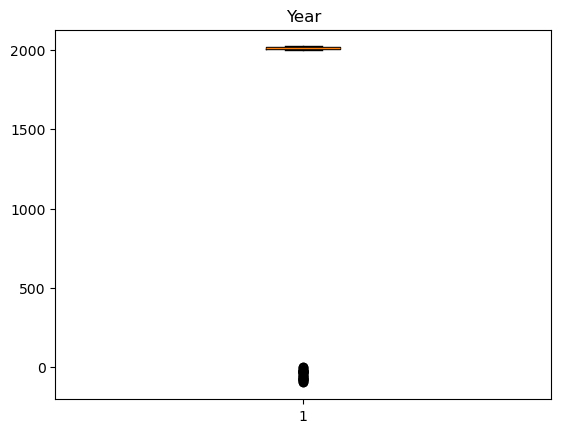

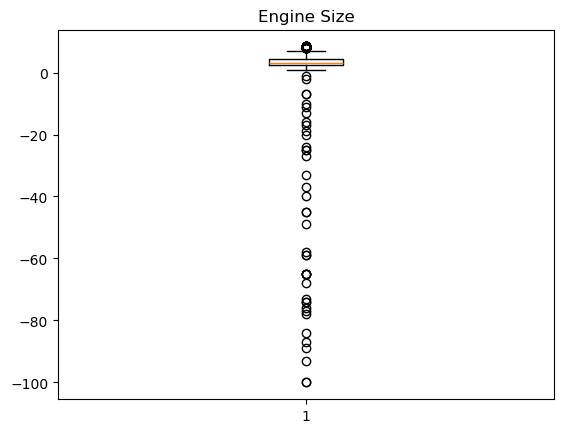

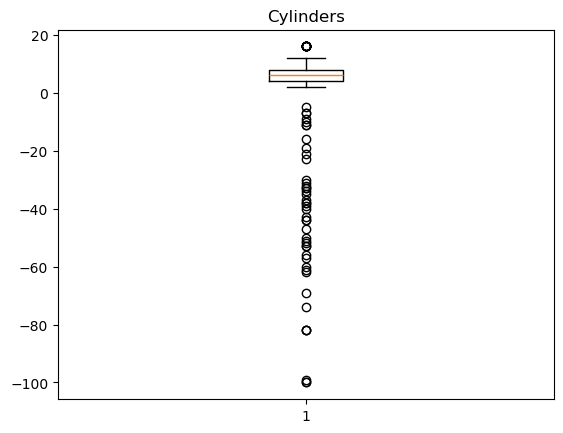

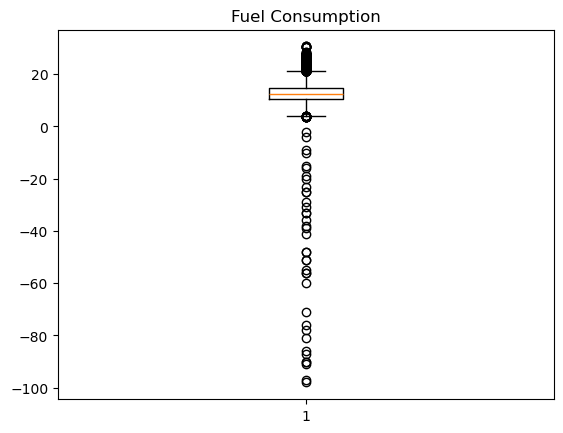

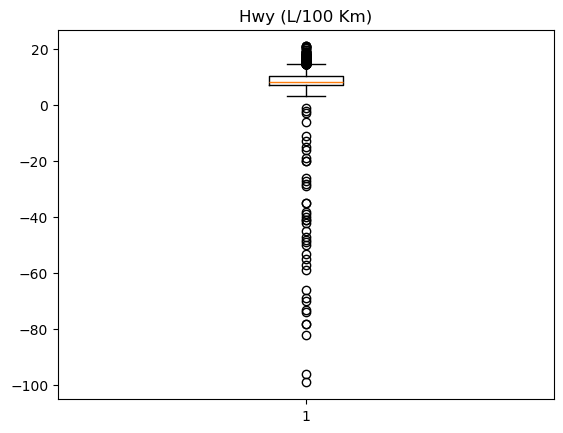

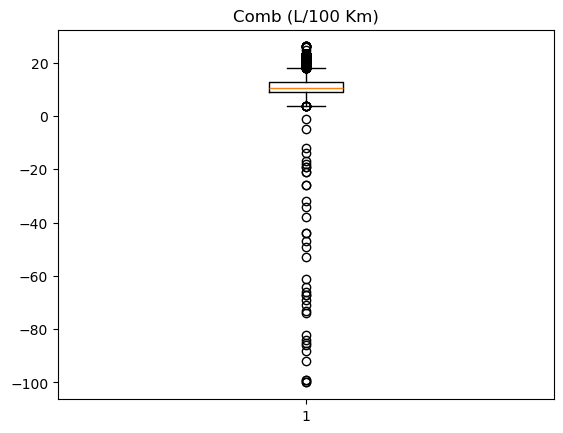

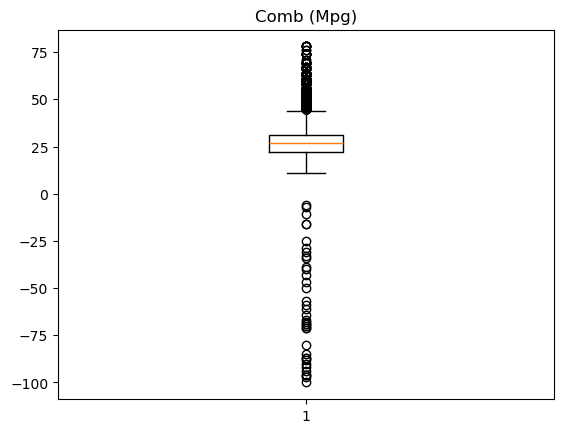

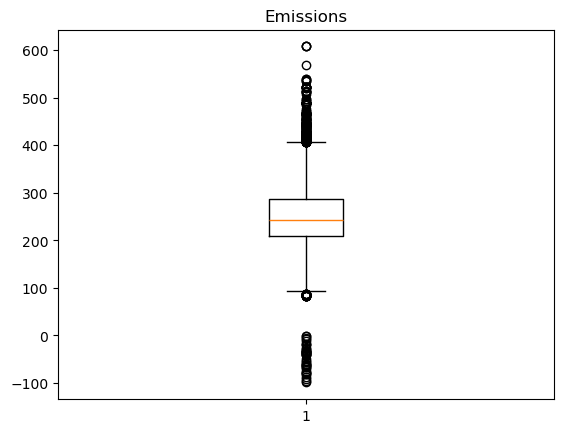

In [1303]:
for column in df_copy[numeric_columns].columns:
     plt.boxplot(df_copy[numeric_columns][column])
     plt.title(column)
     plt.show()

In [1304]:
def interquartile(data, column):
     outliers = []
     Q1 = np.percentile(data[column], 25)
     Q3 = np.percentile(data[column], 75)
     IQR = Q3 - Q1
     
     lower = Q1 - 1.5 * IQR
     upper = Q3 + 1.5 * IQR
     
     outliers = [x for x in data[column] if (x < lower) | (x > upper)]
     
     return lower, upper, outliers

In [1305]:
for column in numeric_columns:
	lower, upper, outliers = interquartile(df_copy, column)
	print(column)
	print(f'Lower bound: {lower}')
	print(f'Upper bound: {upper}')
	print(f'Total outliers: {len(outliers)}')


Year
Lower bound: 1989.5
Upper bound: 2033.5
Total outliers: 34
Engine Size
Lower bound: -0.5500000000000007
Upper bound: 7.050000000000001
Total outliers: 82
Cylinders
Lower bound: -2.0
Upper bound: 14.0
Total outliers: 58
Fuel Consumption
Lower bound: 3.950000000000002
Upper bound: 21.15
Total outliers: 593
Hwy (L/100 Km)
Lower bound: 2.95
Upper bound: 14.549999999999999
Total outliers: 553
Comb (L/100 Km)
Lower bound: 3.7
Upper bound: 18.099999999999998
Total outliers: 592
Comb (Mpg)
Lower bound: 8.5
Upper bound: 44.5
Total outliers: 537
Emissions
Lower bound: 90.5
Upper bound: 406.5
Total outliers: 266


In [1306]:
def z_score(data, column):
     
     mean = data[column].mean()
     Std = data[column].std()
     z_score_list = [x - mean / Std for x in data[column]]
     outliers = [z for z in z_score_list if (z < -3) | (z > 3)]
     
     return mean, Std, z_score_list, outliers

In [1307]:
for column in numeric_columns:
     mean, Std, z_score_list, outliers = z_score(df_copy, column)
     print(column)
     print(f'{len(outliers)}')
     print(z_score_list[:20])
     print(f'Mean and std {mean} {Std}')
     print()

Year
22812
[1977.7908134911079, 1974.7908134911079, 1992.7908134911079, 1982.7908134911079, 1979.7908134911079, 1987.7908134911079, 1990.7908134911079, 1977.7908134911079, 1981.7908134911079, 1985.7908134911079, 1993.7908134911079, 1978.7908134911079, 1979.7908134911079, 1982.7908134911079, 1982.7908134911079, 1977.7908134911079, 1987.7908134911079, 1989.7908134911079, 1976.7908134911079, 1995.7908134911079]
Mean and std 2008.4789584429247 79.67250183715626

Engine Size
5945
[2.8572497811444, 0.3572497811444004, 0.8572497811444004, 1.6572497811444002, 1.5572497811444006, 2.8572497811444, 3.8572497811444, 2.2572497811444006, 3.0572497811444004, 4.1572497811444, 2.1572497811444, 4.1572497811444, 3.5572497811444004, 2.4572497811444007, 4.1572497811444, 2.4572497811444007, 0.8572497811444004, 2.4572497811444007, 2.3572497811444, 5.0572497811444]
Mean and std 3.2641489548568416 2.856397575776187

Cylinders
14523
[4.129078829072611, 2.1290788290726117, 2.1290788290726117, 4.129078829072611, 

In [1308]:
for column in numeric_columns:
     lower, upper, outliers = interquartile(df_copy, column)
     
     outliers_indices = df_copy[column][(df_copy[column] < lower) | (df_copy[column] > upper)].index.tolist()
     
     print(column)
     print(outliers_indices)
     print()
     
     df_copy.drop(index=outliers_indices, errors='ignore', inplace=True)

Year
[1021, 1585, 3696, 5599, 6168, 6239, 7312, 7592, 10055, 10684, 11732, 12430, 12625, 13425, 13634, 14779, 14971, 15044, 15059, 15893, 16527, 16770, 17191, 17364, 17565, 18106, 18394, 19574, 19613, 20407, 21002, 21075, 21768, 22511]

Engine Size
[262, 502, 504, 678, 776, 956, 979, 1518, 1658, 3307, 3427, 3828, 3839, 4002, 4106, 4375, 4393, 4433, 4917, 5238, 5279, 5526, 5687, 6034, 6204, 6247, 6390, 6836, 6875, 7135, 7303, 8163, 8203, 8228, 8599, 8809, 10255, 10806, 10992, 11727, 12591, 12830, 12901, 12917, 13236, 13817, 13840, 14583, 15072, 15463, 15700, 15862, 16609, 18299, 18510, 18986, 19094, 19278, 19489, 19524, 19558, 19661, 19671, 19721, 19900, 19936, 20564, 20612, 20821, 20838, 20924, 21674, 21679, 21772, 22008, 22243, 22354]

Cylinders
[144, 1155, 1679, 2988, 4740, 6158, 7019, 7928, 8588, 10082, 10775, 11091, 11206, 13522, 14521, 14751, 15541, 16154, 16240, 16800, 17209, 17264, 17458, 18219, 19326, 19913, 20301, 20818, 21070, 21370, 21676]

Fuel Consumption
[103, 240, 304, 3

In [1309]:
df_copy.shape

(21211, 13)

In [1310]:
df.shape[0] - df_copy.shape[0]

1601

#### unique values normalization

In [1311]:
for column in object_columns:
	df_copy[column] = df_copy[column].str.lower()
	print(f'Unique Values total before & after normalized in {column}')
	print(f'Before {df[column.upper()].nunique()}')
	print(f'After {df_copy[column].nunique()}')
	print(df[column.upper()].nunique() - df_copy[column].nunique())
	

Unique Values total before & after normalized in Make
Before 88
After 52
36
Unique Values total before & after normalized in Model
Before 4243
After 3563
680
Unique Values total before & after normalized in Vehicle Class
Before 33
After 25
8
Unique Values total before & after normalized in Transmission
Before 31
After 31
0
Unique Values total before & after normalized in Fuel
Before 6
After 6
0


#### Standard Deviation

In [1312]:
df_copy[numeric_columns].describe()

Year   Engine Size     Cylinders  Fuel Consumption  \
count  21211.000000  21211.000000  21211.000000      21211.000000   
mean    2011.542360      3.307621      5.788450         12.562883   
std        6.324938      1.263129      1.722928          2.844299   
min     2000.000000      0.800000      2.000000          6.300000   
25%     2006.000000      2.300000      4.000000         10.500000   
50%     2012.000000      3.000000      6.000000         12.200000   
75%     2017.000000      4.000000      6.000000         14.400000   
max     2022.000000      7.000000     12.000000         20.900000   

       Hwy (L/100 Km)  Comb (L/100 Km)    Comb (Mpg)     Emissions  
count    21211.000000     21211.000000  21211.000000  21211.000000  
mean         8.770844        10.857057     27.242325    248.640129  
std          1.871126         2.365572      5.896923     52.228913  
min          4.900000         5.500000     16.000000    128.000000  
25%          7.400000         9.100000     23.000000    210.000000  
50%          8.400000        10.500000     27.000000    242.000000  
75%         10.000000        12.400000     31.000000    283.000000  
max         14.200000        17.500000     43.000000    392.000000

In [1313]:
standard_deviation_numerical_columns = df_copy[numeric_columns].std()
standard_deviation_numerical_columns

Year                 6.324938
Engine Size          1.263129
Cylinders            1.722928
Fuel Consumption     2.844299
Hwy (L/100 Km)       1.871126
Comb (L/100 Km)      2.365572
Comb (Mpg)           5.896923
Emissions           52.228913
dtype: float64

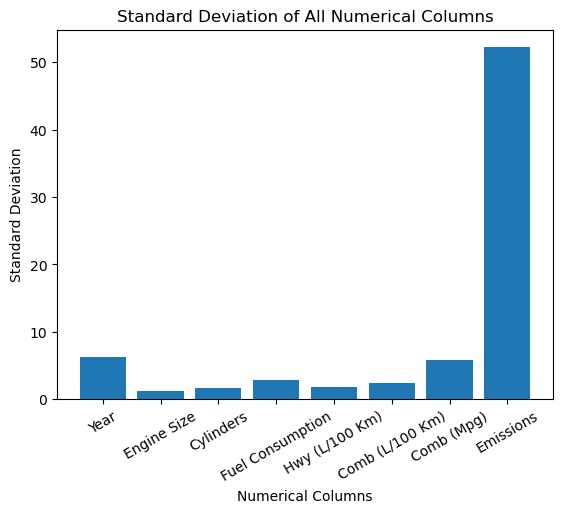

In [1314]:
plt.bar(standard_deviation_numerical_columns.index.tolist(), standard_deviation_numerical_columns.tolist())
plt.title('Standard Deviation of All Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=30)
plt.show()

In [1315]:
df_copy[numeric_columns].describe()


Year   Engine Size     Cylinders  Fuel Consumption  \
count  21211.000000  21211.000000  21211.000000      21211.000000   
mean    2011.542360      3.307621      5.788450         12.562883   
std        6.324938      1.263129      1.722928          2.844299   
min     2000.000000      0.800000      2.000000          6.300000   
25%     2006.000000      2.300000      4.000000         10.500000   
50%     2012.000000      3.000000      6.000000         12.200000   
75%     2017.000000      4.000000      6.000000         14.400000   
max     2022.000000      7.000000     12.000000         20.900000   

       Hwy (L/100 Km)  Comb (L/100 Km)    Comb (Mpg)     Emissions  
count    21211.000000     21211.000000  21211.000000  21211.000000  
mean         8.770844        10.857057     27.242325    248.640129  
std          1.871126         2.365572      5.896923     52.228913  
min          4.900000         5.500000     16.000000    128.000000  
25%          7.400000         9.100000     23.000000    210.000000  
50%          8.400000        10.500000     27.000000    242.000000  
75%         10.000000        12.400000     31.000000    283.000000  
max         14.200000        17.500000     43.000000    392.000000

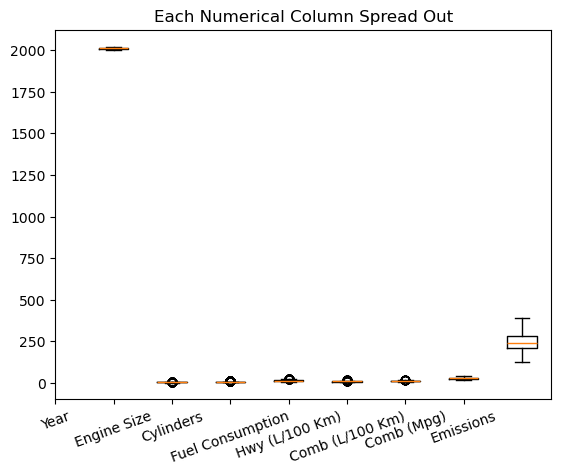

In [1316]:
data = [df_copy[x].values.tolist() for x in df_copy[numeric_columns].columns]
plt.boxplot(data)
plt.title('Each Numerical Column Spread Out')
plt.xticks(range(8), df_copy[numeric_columns].columns.tolist(), rotation=20)
plt.show()

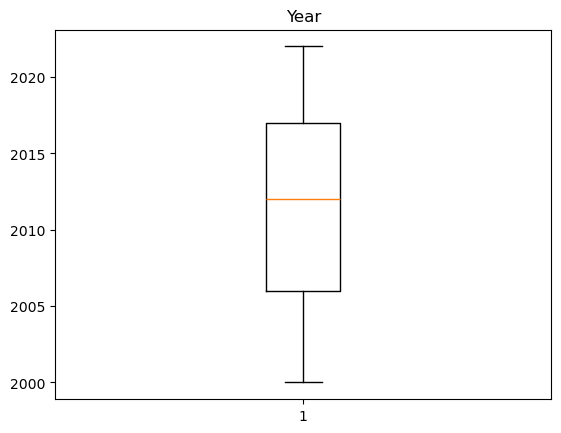

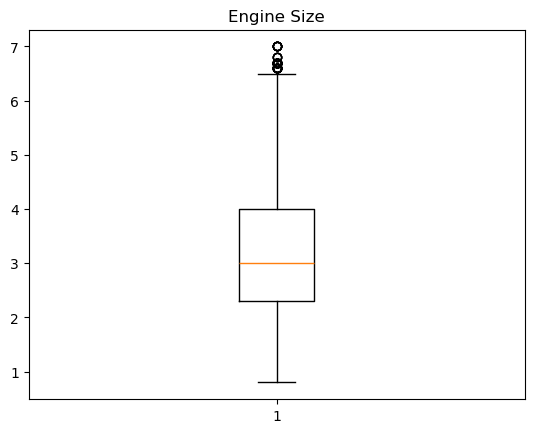

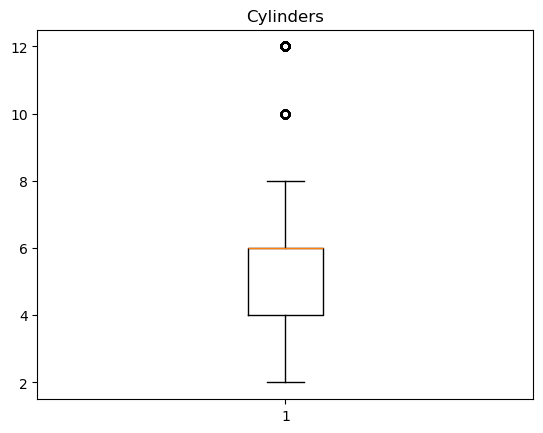

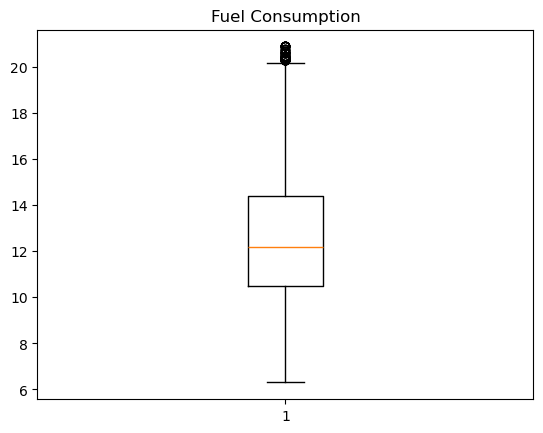

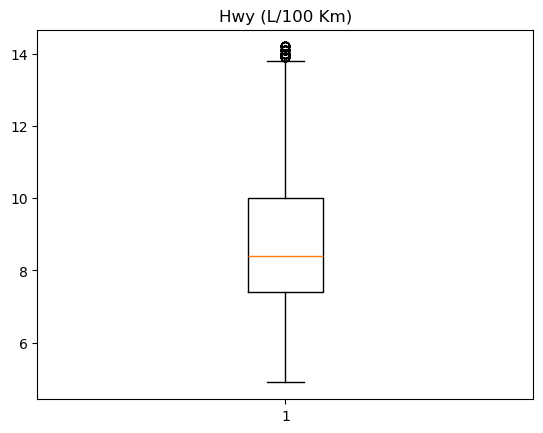

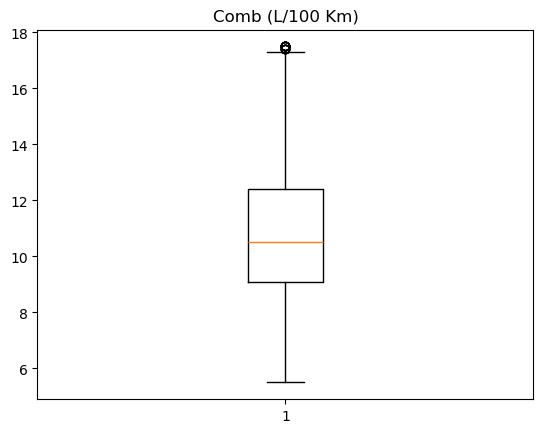

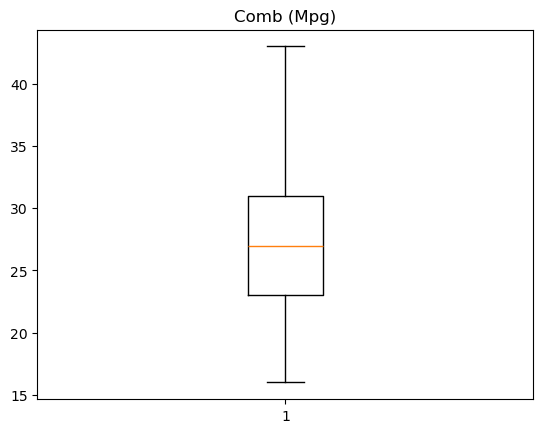

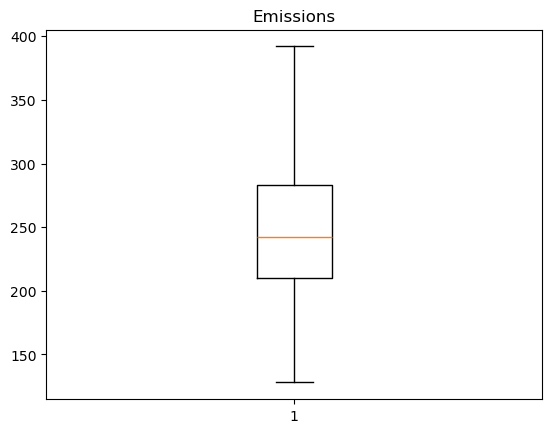

In [1317]:
for column in df_copy[numeric_columns].columns:
     plt.boxplot(df_copy[numeric_columns][column])
     plt.title(column)
     plt.show()

In [1318]:
for column in numeric_columns:
	lower, upper, outliers = interquartile(df_copy, column)
	print(column)
	print(f'Lower bound: {lower}')
	print(f'Upper bound: {upper}')
	print(f'Total outliers: {len(outliers)}')

Year
Lower bound: 1989.5
Upper bound: 2033.5
Total outliers: 0
Engine Size
Lower bound: -0.25000000000000044
Upper bound: 6.550000000000001
Total outliers: 96
Cylinders
Lower bound: 1.0
Upper bound: 9.0
Total outliers: 445
Fuel Consumption
Lower bound: 4.6499999999999995
Upper bound: 20.25
Total outliers: 74
Hwy (L/100 Km)
Lower bound: 3.500000000000001
Upper bound: 13.899999999999999
Total outliers: 72
Comb (L/100 Km)
Lower bound: 4.149999999999999
Upper bound: 17.35
Total outliers: 18
Comb (Mpg)
Lower bound: 11.0
Upper bound: 43.0
Total outliers: 0
Emissions
Lower bound: 100.5
Upper bound: 392.5
Total outliers: 0


NOTE MISSING VALUES:
- All numerical columns have missing values except fuel and transmission, while object didn't
- For further visualization, all the missing values are imputed by mean of the column

NOTE OUTLIERS:
- Even though the outliers have been drop, it will output again, in the second iteration, because the Q1 and Q3 will be different after the 1st batch outliers eliminated
- On the pre processing we are going to keep this. This approach balances cleaning the data while preserving its true characteristics, avoiding over-filtering or introducing bias.

NOTE STANDARD DEVIATION AND VALUES RANGES
- Out of all columns, emissions column have big deviations across the data points


### **TRANSMISSION**

In [1319]:
def pie_plot(title: str, values, labels):
     plt.pie(values, labels=labels, autopct="%2.2f%%", startangle=90)
     plt.title(title)
     plt.show()

#### Unique Value of The Transmissions

In [1320]:
df_copy['Transmission'].nunique()

31

#### Top 5 most frequent transmission

In [1321]:
df_copy['Transmission'].value_counts().reset_index().head()

Transmission  count
0           a4   3206
1          as6   2730
2           m6   2497
3           m5   2023
4           a6   1746

#### Transmission and its fuel 

In [1322]:
transmission_and_fuel_freq = df_copy.groupby(['Transmission', 'Fuel'])['Fuel'].agg(['count']).reset_index().sort_values(['Transmission','count'], ascending=(True, False))
transmission_and_fuel_freq

Transmission     Fuel  count
1           a10        x     67
2           a10        z     60
0           a10        d     35
3            a3        x     23
7            a4        x   2827
..          ...      ...    ...
91           m7        x      7
94      unknown  unknown      7
96      unknown        z      5
95      unknown        x      4
93      unknown        e      1

[97 rows x 3 columns]

#### Top 5 transmission and its most frequent Fuel Type and the Fuel type counts
A4 has several fuel type, but its most freq is x and x appears the most across transmission

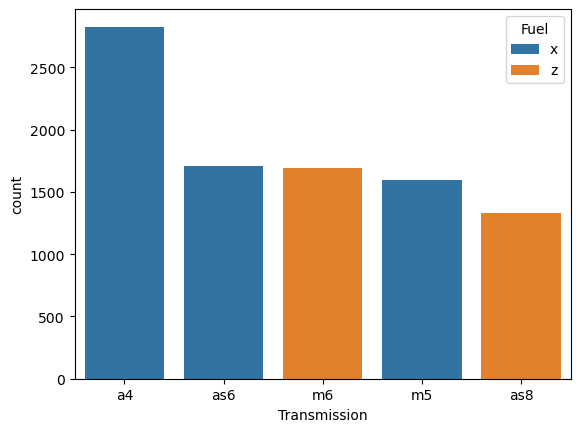

Transmission Fuel  count
2            a4    x   2827
16          as6    x   1707
28           m6    z   1689
27           m5    x   1593
18          as8    z   1327

In [1323]:
top_5_transmission_and_fuel_freq = transmission_and_fuel_freq.groupby('Transmission', as_index=False).first().sort_values(['count'], ascending=False).head()
sns.barplot(top_5_transmission_and_fuel_freq, x='Transmission', y='count', hue='Fuel')
plt.show()
display(top_5_transmission_and_fuel_freq)

#### TRANSMISSION and their average ENGINE SIZE, CYLINDERS, HWY (L/100 km), COMB (L/100 km), COMB (mpg)
transmission in year has the most uneven distirbution, most of them are above the average year

In [1324]:
def transmission_distribution(data, column):
     # MEAN VALUES OF EACH COLUMN GROUPBY ON TRANSMISSION
     transmission_column_mean = data.groupby('Transmission')[column].agg(['mean']).reset_index().sort_values('mean', ascending=False)
     
     
     # DISTRIBUTION OF THE COLUMN BELOW AND ABOVE THE AVG
     above_avg = transmission_column_mean['mean'] > np.mean(data[column])
     below_avg = transmission_column_mean['mean'] < np.mean(data[column])
     transmission_column_distiribution = pd.DataFrame([sum(above_avg), sum(below_avg)], index=['above avg', 'below avg'], columns=['count'])
     transmission_column_distiribution['percentage'] = round(transmission_column_distiribution['count'] / sum(transmission_column_distiribution['count']) * 100, 4)
     transmission_column_distiribution['values'] = [transmission_column_mean['Transmission'][above_avg].tolist(),\
	 	transmission_column_mean['Transmission'][below_avg].tolist()]
	
     
     # DISTIRBUTION BY PIE PLOT 
     plt.figure(figsize=(5,5))
     transmission_pie_plot = pie_plot(f'Distribution of {column}', values=transmission_column_distiribution['count'].tolist(), labels=transmission_column_distiribution.index.tolist()) 
     
     return transmission_column_mean, transmission_column_distiribution, transmission_pie_plot

Year Avg Based on Transmission
Mean of Year: 2011.5423600961765


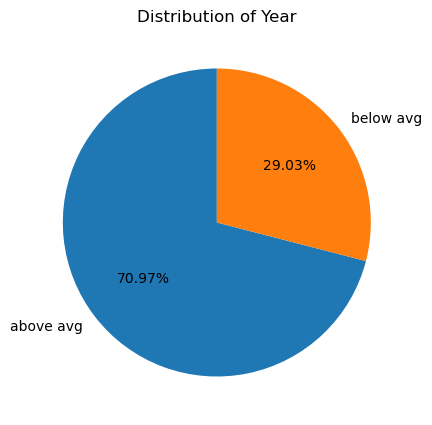

Transmission         mean
21          av1  2021.500000
0           a10  2021.154321
22         av10  2020.520000
11          am8  2020.453988
13         as10  2020.222581




Engine Size Avg Based on Transmission
Mean of Engine Size: 3.3076206444556395


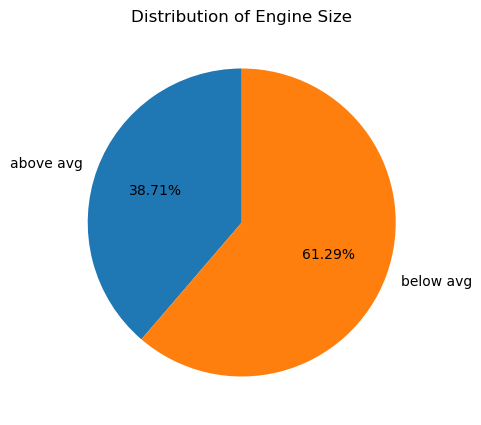

Transmission      mean
0           a10  4.992593
6            a8  4.116454
17          as7  4.091032
5            a7  3.990415
4            a6  3.904713




Cylinders Avg Based on Transmission
Mean of Cylinders: 5.788450485004284


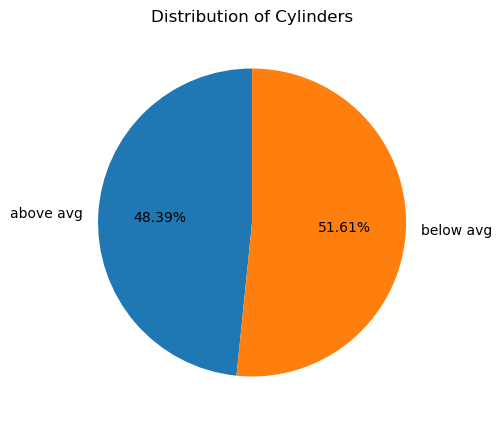

Transmission      mean
0           a10  7.382716
5            a7  6.871839
6            a8  6.725765
17          as7  6.692026
4            a6  6.502444




Fuel Consumption Avg Based on Transmission
Mean of Fuel Consumption: 12.562883253781063


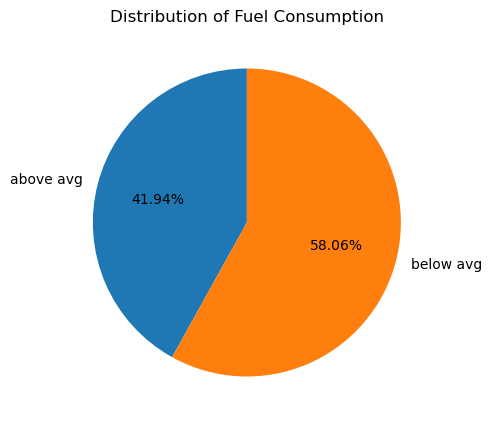

Transmission       mean
0          a10  14.767901
6           a8  13.791022
4           a6  13.736875
3           a5  13.710285
2           a4  13.562258




Hwy (L/100 Km) Avg Based on Transmission
Mean of Hwy (L/100 Km): 8.770844354974153


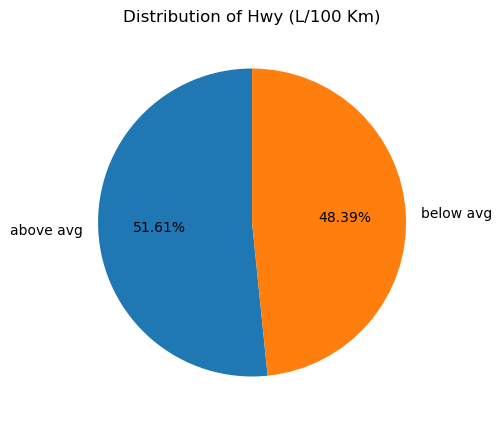

Transmission       mean
0           a10  11.191975
12          am9  10.800000
1            a3  10.686957
13         as10  10.059355
6            a8   9.518112




Comb (L/100 Km) Avg Based on Transmission
Mean of Comb (L/100 Km): 10.857056965204437


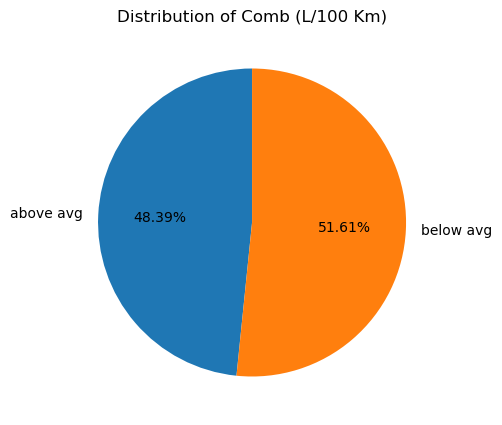

Transmission       mean
0           a10  13.159877
1            a3  12.243478
13         as10  11.934516
6            a8  11.877836
3            a5  11.752541




Comb (Mpg) Avg Based on Transmission
Mean of Comb (Mpg): 27.242324725048515


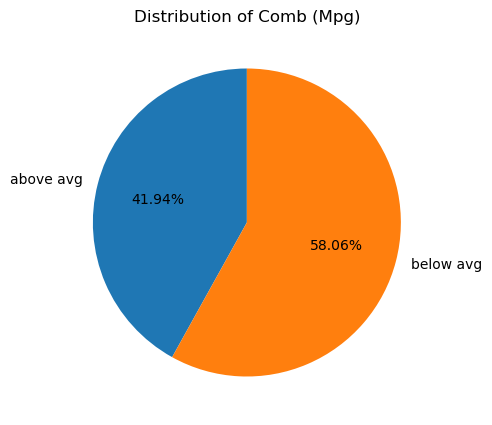

Transmission       mean
8           am5  43.000000
21          av1  40.666667
26           m4  39.000000
22         av10  37.320000
24          av7  34.651852




Emissions Avg Based on Transmission
Mean of Emissions: 248.64012929800396


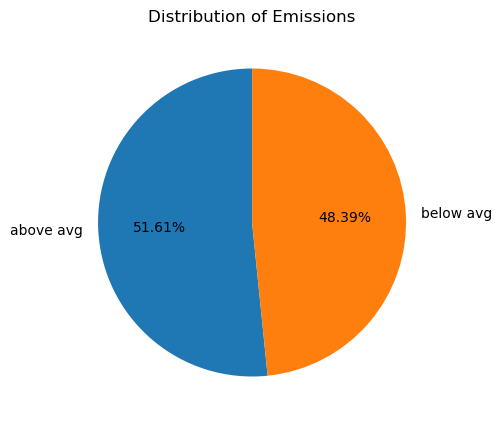

Transmission        mean
0           a10  315.771605
1            a3  281.565217
13         as10  277.209677
6            a8  273.023562
3            a5  269.131540

In [1325]:
for column in numeric_columns:
     print(f'{column} Avg Based on Transmission')
     print(f'Mean of {column}: {np.mean(df_copy[column])}')
     transmission_column_mean, transmission_column_distiribution, transmission_pie_plot = transmission_distribution(df_copy, column)
     display(transmission_column_mean.head())
     print('\n\n')

### FUEL

In [1326]:
df_copy.head()

Year     Make                    Model            Vehicle Class  \
0  2003     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000   daewoo                    lanos               subcompact   
2  2018    honda              civic sedan                 mid-size   
3  2008     saab    9-3 convertible turbo               subcompact   
4  2005  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  Fuel Consumption  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x              15.4            10.7   
1          1.5        4.0           a4    x               9.9             5.9   
2          2.0        4.0           av    x               7.8             6.0   
3          2.8        6.0          as6    z              14.5             8.3   
4          2.7        6.0           a4    x              12.3             8.8   

   Comb (L/100 Km)  Comb (Mpg)  Emissions  
0             13.3        21.0      306.0  
1              8.1        35.0      186.0  
2              7.0        40.0      163.0  
3             11.7        24.0      269.0  
4             10.7        26.0      246.0

In [1327]:
df_copy['Fuel'].unique()

array(['x', 'z', 'e', 'd', 'n', 'unknown'], dtype=object)

#### Fuel and its transmission

In [1328]:
fuel_and_transmission_freq = df_copy.groupby(['Fuel', 'Transmission'])['Transmission'].agg(['count']).reset_index()
fuel_and_transmission_freq

Fuel Transmission  count
0     d          a10     35
1     d           a4      1
2     d           a5      6
3     d           a6     50
4     d           a7     24
..  ...          ...    ...
92    z          av8     31
93    z           m5    409
94    z           m6   1689
95    z           m7    122
96    z      unknown      5

[97 rows x 3 columns]

#### Fuel and its most frequent transmission
fuel type has several transmissions, but its most frequent is A4 and A4 appears the most out of all Fuel

In [1329]:
fuel_and_transmission_freq.groupby('Fuel', as_index=False).first().sort_values(['count'], ascending=False)

Fuel Transmission  count
1        e           a4    128
4        x          a10     67
5        z          a10     60
0        d          a10     35
2        n           a4     20
3  unknown           a6      3

#### Fuel and its average on every numerical columns
Fuel Type of E and N is relatively distinct to other fuel types, they are bigger in all columns except comb and the opposite when it comes to comb.

In [1330]:
fuel_and_numerical_columns = df_copy.groupby('Fuel')[numeric_columns].agg(['mean']).reset_index()
fuel_and_numerical_columns

Fuel         Year Engine Size Cylinders Fuel Consumption Hwy (L/100 Km)  \
                   mean        mean      mean             mean           mean   
0        d  2016.712598    2.757874  5.314961        10.530315       7.701181   
1        e  2012.414309    3.749085  6.221298        17.207525      11.579241   
2        n  2003.285714    5.114286  7.523810        18.166667      12.419048   
3  unknown  2011.944444    3.378930  5.764202        12.219136       9.139924   
4        x  2010.890352    3.190690  5.428525        12.073512       8.628669   
5        z  2012.176686    3.436359  6.221583        12.913151       8.783039   

  Comb (L/100 Km) Comb (Mpg)   Emissions  
             mean       mean        mean  
0        9.254030  31.295276  248.665354  
1       14.680405  19.632657  236.981697  
2       15.576190  18.809524  293.285714  
3       10.080392  25.939312  240.830313  
4       10.526197  28.182111  243.393528  
5       11.053622  26.476462  255.928091

In [1331]:
df_copy['Make'].nunique()

52

FUEL TYPES AND ITS AVG VALUE IN THE NUMERICAL COLUMNS


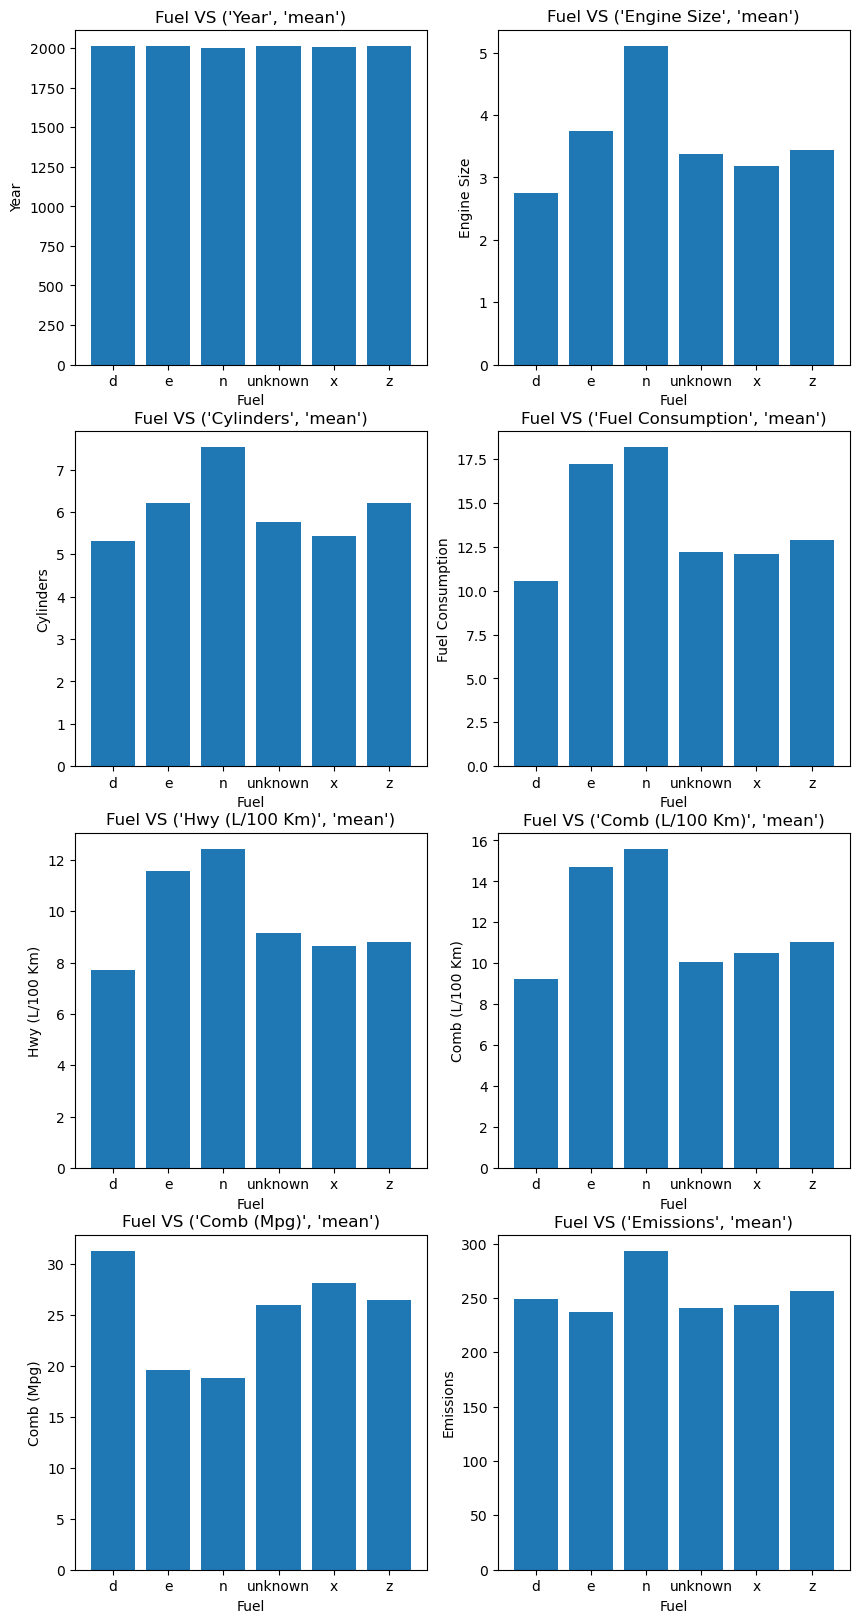

In [1332]:
plt.figure(figsize=(10,20))
for i, column in enumerate(fuel_and_numerical_columns.drop(columns=('Fuel','')).columns.tolist()):
     plt.subplot(4, 2, i+1)
     plt.bar(fuel_and_numerical_columns['Fuel'], height=fuel_and_numerical_columns[column])
     plt.xlabel('Fuel')
     plt.ylabel(column[0])
     plt.title(f'Fuel VS {column}')
print('FUEL TYPES AND ITS AVG VALUE IN THE NUMERICAL COLUMNS')
plt.show()

In [1333]:
fuel_and_numerical_columns.columns.tolist()

[('Fuel', ''),
 ('Year', 'mean'),
 ('Engine Size', 'mean'),
 ('Cylinders', 'mean'),
 ('Fuel Consumption', 'mean'),
 ('Hwy (L/100 Km)', 'mean'),
 ('Comb (L/100 Km)', 'mean'),
 ('Comb (Mpg)', 'mean'),
 ('Emissions', 'mean')]

#### Distribution fuel which has above or below than average of each numeric columns

In [1334]:
fuel_and_numerical_columns_distribution = pd.DataFrame('', index=['Above Avg', 'Below Avg'], columns=numeric_columns)
fuel_and_numerical_columns_distribution

Year Engine Size Cylinders Fuel Consumption Hwy (L/100 Km)  \
Above Avg                                                              
Below Avg                                                              

          Comb (L/100 Km) Comb (Mpg) Emissions  
Above Avg                                       
Below Avg

In [1335]:
for column in fuel_and_numerical_columns.drop(columns=('Fuel','')).columns:
	above_avg_mask = fuel_and_numerical_columns[column] > np.mean(df_copy[column[0]])
	above_avg = list(fuel_and_numerical_columns[('Fuel', '')][above_avg_mask])
	below_avg = list(fuel_and_numerical_columns[('Fuel', '')][~above_avg_mask])
	fuel_and_numerical_columns_distribution[column[0]] = [above_avg, below_avg]

In [1336]:
fuel_and_numerical_columns_distribution

Year         Engine Size        Cylinders  \
Above Avg  [d, e, unknown, z]  [e, n, unknown, z]        [e, n, z]   
Below Avg              [n, x]              [d, x]  [d, unknown, x]   

          Fuel Consumption      Hwy (L/100 Km)  Comb (L/100 Km)  \
Above Avg        [e, n, z]  [e, n, unknown, z]        [e, n, z]   
Below Avg  [d, unknown, x]              [d, x]  [d, unknown, x]   

                   Comb (Mpg)        Emissions  
Above Avg              [d, x]        [d, n, z]  
Below Avg  [e, n, unknown, z]  [e, unknown, x]

in case of the fuel type above and below average, fuel type of x and z are always opposite to one another

### FUEL CONSUMPTION

In [1337]:
df_copy.head()

Year     Make                    Model            Vehicle Class  \
0  2003     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000   daewoo                    lanos               subcompact   
2  2018    honda              civic sedan                 mid-size   
3  2008     saab    9-3 convertible turbo               subcompact   
4  2005  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  Fuel Consumption  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x              15.4            10.7   
1          1.5        4.0           a4    x               9.9             5.9   
2          2.0        4.0           av    x               7.8             6.0   
3          2.8        6.0          as6    z              14.5             8.3   
4          2.7        6.0           a4    x              12.3             8.8   

   Comb (L/100 Km)  Comb (Mpg)  Emissions  
0             13.3        21.0      306.0  
1              8.1        35.0      186.0  
2              7.0        40.0      163.0  
3             11.7        24.0      269.0  
4             10.7        26.0      246.0

In [1338]:
df_copy['Fuel Consumption'].describe()

count    21211.000000
mean        12.562883
std          2.844299
min          6.300000
25%         10.500000
50%         12.200000
75%         14.400000
max         20.900000
Name: Fuel Consumption, dtype: float64

#### Top 5 Biggest Fuel Consumption and Emissions
Max fuel consumption is 20.9

In [1339]:
df_copy[['Fuel Consumption', 'Emissions']].sort_values(['Fuel Consumption', 'Emissions'], ascending=False).head()

Fuel Consumption  Emissions
11385              20.9      391.0
15889              20.9      391.0
21177              20.9      391.0
21744              20.9      391.0
16598              20.9      389.0

#### Mean, Min, Max of Emissions based on the Maximum Fuel Consumption
The min and max emissions produced based on the maximum fuel consumption is 272 and 391

In [1340]:
# maximum fuel consumption emissions mean and range from min to max
max_fuel_consume = max(np.floor(df_copy['Fuel Consumption']))
print(f'Max Fuel Consumption: {max_fuel_consume}')

emissions_max_fuel_consume = df_copy[np.floor(df_copy['Fuel Consumption']) == max(np.floor(df_copy['Fuel Consumption']))]['Emissions']
mean_emissions_max_fuel_consume = round(emissions_max_fuel_consume.mean(),1)
print(f'Mean of emissions of maximum fuel consumption {mean_emissions_max_fuel_consume}') 

min_max_range_emissions_max_fuel_consume = [min(emissions_max_fuel_consume), max(emissions_max_fuel_consume)]
print(f'Min max of emissions of maximum fuel consumption {min_max_range_emissions_max_fuel_consume}') 

Max Fuel Consumption: 20.0
Mean of emissions of maximum fuel consumption 349.0
Min max of emissions of maximum fuel consumption [272.0, 391.0]


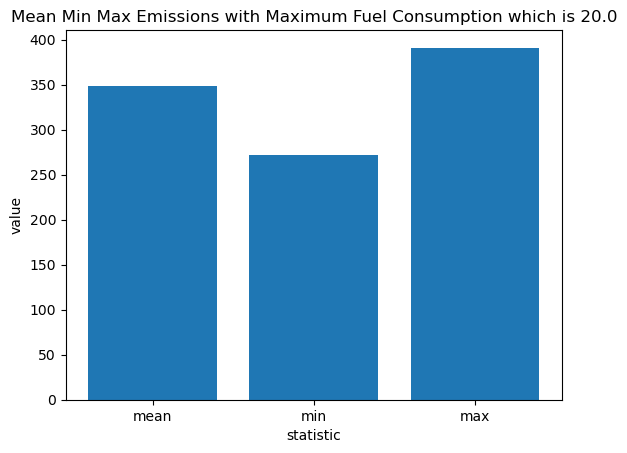

In [1341]:
result =  [mean_emissions_max_fuel_consume, min(emissions_max_fuel_consume), max(emissions_max_fuel_consume)]
plt.bar(['mean','min','max'], height=result)
plt.title(f'Mean Min Max Emissions with Maximum Fuel Consumption which is {max_fuel_consume}')
plt.xlabel('statistic')
plt.ylabel('value')
plt.show()

- FUEL CONSUMPTION distirbution Emmission than average (di buat line plot untuk melihat peningkatannya)
- FUEL CONSUMPTION distirbution based on their emmision average (make it ranges)

In [1342]:
df_copy.head()

Year     Make                    Model            Vehicle Class  \
0  2003     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000   daewoo                    lanos               subcompact   
2  2018    honda              civic sedan                 mid-size   
3  2008     saab    9-3 convertible turbo               subcompact   
4  2005  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  Fuel Consumption  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x              15.4            10.7   
1          1.5        4.0           a4    x               9.9             5.9   
2          2.0        4.0           av    x               7.8             6.0   
3          2.8        6.0          as6    z              14.5             8.3   
4          2.7        6.0           a4    x              12.3             8.8   

   Comb (L/100 Km)  Comb (Mpg)  Emissions  
0             13.3        21.0      306.0  
1              8.1        35.0      186.0  
2              7.0        40.0      163.0  
3             11.7        24.0      269.0  
4             10.7        26.0      246.0

#### Spread of Emissions in Fuel Consumption

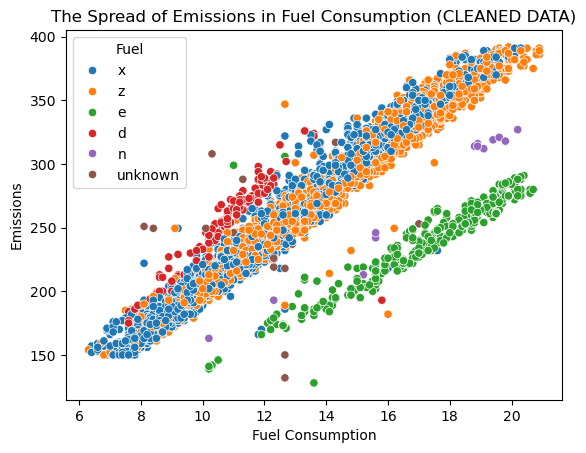

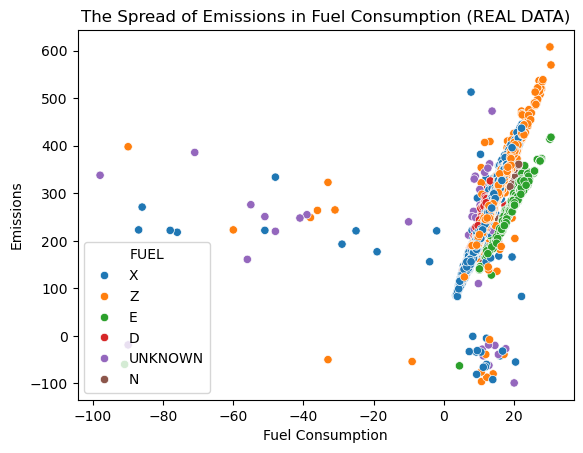

In [1343]:
# plt.scatter(df_copy['Fuel Consumption'], df_copy['Emissions'], marker='o')
sns.scatterplot(df_copy, x='Fuel Consumption', y='Emissions', hue='Fuel')
plt.title('The Spread of Emissions in Fuel Consumption (CLEANED DATA)')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.show()

sns.scatterplot(df, x='FUEL CONSUMPTION', y='EMISSIONS', hue='FUEL')
plt.title('The Spread of Emissions in Fuel Consumption (REAL DATA)')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.show()

NOTE: The data are densed around 0-20 (x axis) and divided into two big groups based on the y axis, one is around 0 - (-100) and 80-600. On the other hand, on the x axis, there are some data that are scattered in the range of 0 - (-100) 

In [1344]:
df_copy['E / FC'] = round(df_copy['Emissions'] / df_copy['Fuel Consumption'],1)
df['E / FC'] = round(df['EMISSIONS'] / df['FUEL CONSUMPTION'],1)

### Emission / Fuel Consumption (E / FC)

E / FC = Emission / Fuel Consumption

In [1345]:
df_copy.head()

Year     Make                    Model            Vehicle Class  \
0  2003     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000   daewoo                    lanos               subcompact   
2  2018    honda              civic sedan                 mid-size   
3  2008     saab    9-3 convertible turbo               subcompact   
4  2005  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  Fuel Consumption  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x              15.4            10.7   
1          1.5        4.0           a4    x               9.9             5.9   
2          2.0        4.0           av    x               7.8             6.0   
3          2.8        6.0          as6    z              14.5             8.3   
4          2.7        6.0           a4    x              12.3             8.8   

   Comb (L/100 Km)  Comb (Mpg)  Emissions  E / FC  
0             13.3        21.0      306.0    19.9  
1              8.1        35.0      186.0    18.8  
2              7.0        40.0      163.0    20.9  
3             11.7        24.0      269.0    18.6  
4             10.7        26.0      246.0    20.0

In [1346]:
(df_copy['Fuel Consumption'].iloc[0] * 55/100) + (df_copy['Hwy (L/100 Km)'].iloc[0] * 45/100)

13.285

In [1347]:
df['E / FC']

0        19.9
1        18.8
2        20.9
3        18.6
4        20.0
         ... 
22807    20.0
22808    20.9
22809    19.6
22810    20.3
22811    19.7
Name: E / FC, Length: 22812, dtype: float64

In [1348]:
df_copy['E / FC'].describe()

count    21211.000000
mean        19.918594
std          1.377416
min          9.400000
25%         19.500000
50%         19.900000
75%         20.500000
max         31.000000
Name: E / FC, dtype: float64

#### Spread of E/FC in Make (brand) by Fuel
- Make(brand) with Fuel type e has lower range than the others
- Make(brand) with Fuel type x, z has the range around 18-25
- Make(brand) with Fuel type d has upper range than other
- Make(brand) with Fuel Type of unknown is very spread out

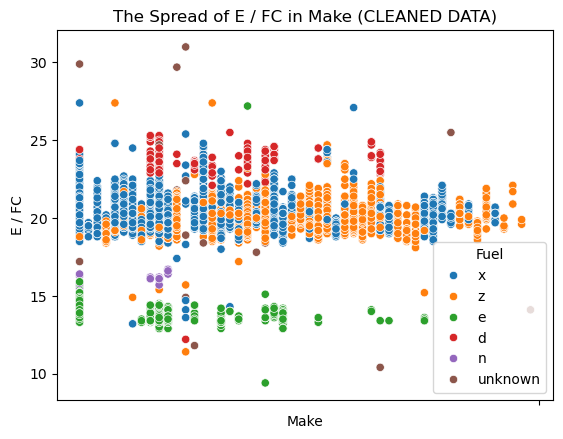

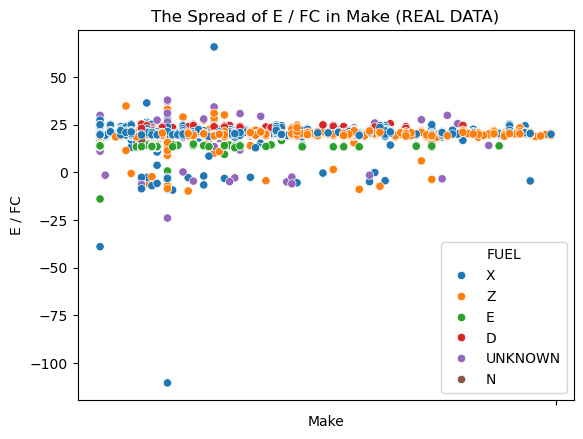

In [1349]:
sns.scatterplot(df_copy, x='Make', y='E / FC', hue='Fuel')
plt.title('The Spread of E / FC in Make (CLEANED DATA)')
plt.xlabel('Make')
plt.ylabel('E / FC')
plt.xticks('')
plt.show()

sns.scatterplot(df, x='MAKE', y='E / FC', hue='FUEL')
plt.title('The Spread of E / FC in Make (REAL DATA)')
plt.xlabel('Make')
plt.ylabel('E / FC')
plt.xticks('')
plt.show()

#### Top 5 Transmission with most and least of E/FC

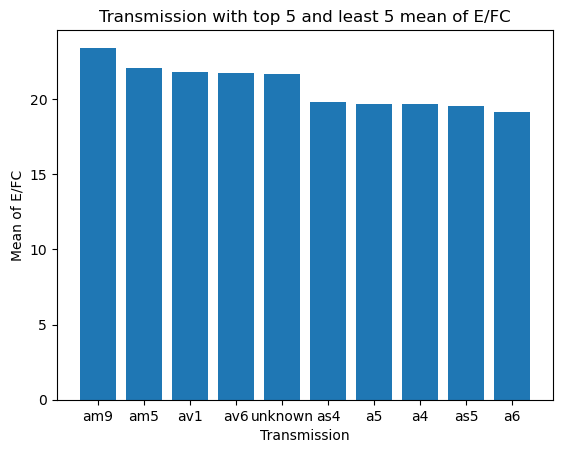

In [1350]:
# Top 5 Transmission with most and least of E / FC 
Top_upper_5 = df_copy.groupby('Transmission')['E / FC'].agg(['mean']).reset_index().sort_values('mean', ascending=False).head(5)
Top_lower_5 = df_copy.groupby('Transmission')['E / FC'].agg(['mean']).reset_index().sort_values('mean', ascending=False).tail(5)
plt.bar(Top_upper_5['Transmission'].tolist() + Top_lower_5['Transmission'].tolist(), Top_upper_5['mean'].tolist() + Top_lower_5['mean'].tolist())
plt.title('Transmission with top 5 and least 5 mean of E/FC')
plt.xlabel('Transmission')
plt.ylabel('Mean of E/FC')
plt.show()

#### Top 5 Make with most and least of E/FC

In [1351]:
df_copy.columns.tolist()

['Year',
 'Make',
 'Model',
 'Vehicle Class',
 'Engine Size',
 'Cylinders',
 'Transmission',
 'Fuel',
 'Fuel Consumption',
 'Hwy (L/100 Km)',
 'Comb (L/100 Km)',
 'Comb (Mpg)',
 'Emissions',
 'E / FC']

In [1352]:
df_copy['E / C(Mpg)'] = df_copy['Emissions'] / df_copy['Comb (Mpg)']
df_copy['E / C(L/100 Km)'] = df_copy['Emissions'] / df_copy['Comb (L/100 Km)']
df_copy['E / H(L/100 Km)'] = df_copy['Emissions'] / df_copy['Hwy (L/100 Km)']

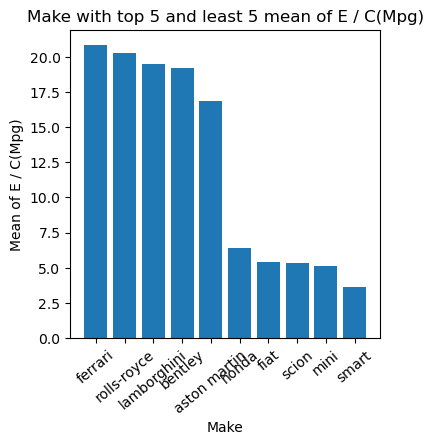

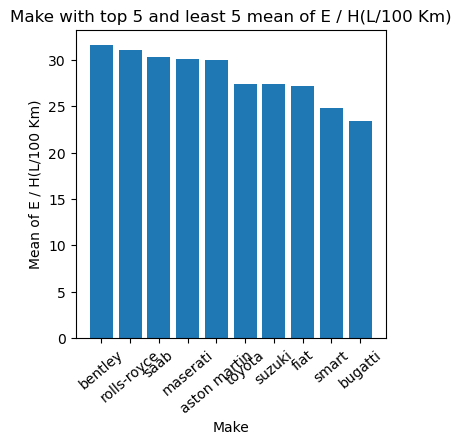

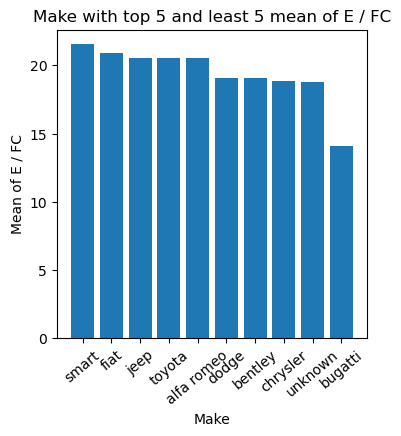

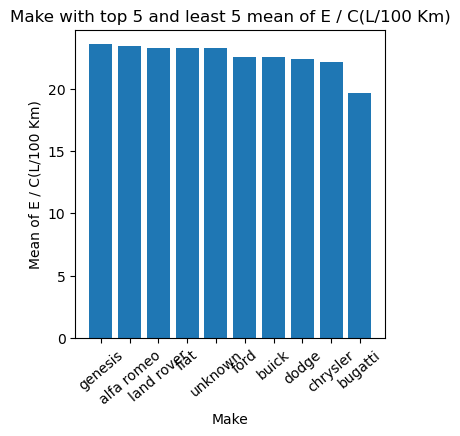

Make E / C(Mpg) E / H(L/100 Km)     E / FC E / C(L/100 Km)  \
                        mean            mean       mean            mean   
13        ferrari  20.881043       29.707255  19.461538       22.999894   
41    rolls-royce  20.285489       31.051785  19.180000       23.160232   
26    lamborghini  19.525517       29.568576  19.759677       23.177393   
4         bentley  19.240834       31.669656  19.045783       23.249495   
2    aston martin  16.853056       30.009497  19.543810       23.183447   
30       maserati  16.175153       30.155417  19.766387       23.239330   
19         hummer  15.521533       27.552163  20.305263       22.999388   
17            gmc  14.045905       27.774984  19.789861       22.704090   
27     land rover  13.988425       28.463698  20.350602       23.326751   
22          isuzu  13.757660       28.155170  20.368421       23.204225   
6         bugatti  12.863636       23.388430  14.100000       19.652778   
12          dodge  12.705621       28.639119  19.061098       22.402571   
40            ram  12.484594       28.461054  20.114583       23.176931   
9       chevrolet  11.598564       28.095758  19.606889       22.651808   
16        genesis  11.510329       29.044018  20.480952       23.581565   
37       plymouth  11.354167       28.990945  19.750000       22.995656   
32  mercedes-benz  11.325740       29.063746  19.988000       23.227460   
15           ford  11.052606       27.589088  19.752852       22.593548   
29        lincoln  11.049904       28.721007  19.727143       22.996994   
8        cadillac  10.773936       29.692404  19.565871       23.078494   
23         jaguar  10.583476       29.672125  19.638843       23.134277   
39        porsche  10.143465       28.814027  20.049646       23.187480   
24           jeep  10.026534       27.432351  20.575283       23.129519   
21       infiniti  10.018130       28.694706  20.069176       23.138359   
5             bmw   9.920185       29.625659  19.731166       23.204200   
3            audi   9.675698       29.184083  19.899752       23.197496   
28          lexus   9.355766       28.112007  20.311888       23.153535   
10       chrysler   9.050319       28.548508  18.821462       22.196570   
35         nissan   8.991663       27.692923  20.450200       23.152035   
48         toyota   8.794829       27.404676  20.557014       23.119249   
7           buick   8.673847       28.669670  19.296000       22.577118   
36     oldsmobile   8.656156       29.959137  19.376471       23.001265   
42           saab   8.589641       30.271528  19.236316       22.989561   
49        unknown   8.385554       29.617134  18.800000       23.262597   
51          volvo   8.216899       29.006961  19.788155       23.072726   
1      alfa romeo   8.026533       28.192215  20.547619       23.475481   
0           acura   7.622282       28.449671  20.099590       23.114392   
34     mitsubishi   7.400212       27.946991  20.189902       23.051418   
46         subaru   7.370962       27.913417  20.276775       23.095291   
38        pontiac   7.330342       29.330626  19.444223       22.888540   
31          mazda   7.285058       27.637527  20.329744       23.055231   
25            kia   7.226625       27.966198  20.412903       23.226073   
50     volkswagen   7.062268       28.727413  20.042219       23.160653   
20        hyundai   7.029610       28.285939  20.306823       23.205724   
43         saturn   6.963388       29.045126  19.628205       22.950019   
47         suzuki   6.698342       27.368344  20.292893       22.993754   
11         daewoo   6.484015       29.833902  19.347059       23.005548   
18          honda   6.383496       27.922041  20.377016       23.148238   
14           fiat   5.428874       27.174229  20.881250       23.267490   
44          scion   5.348112       27.406296  20.362500       23.052456   
33           mini   5.144641       27.707041  20.459744       23.163636   
45          smart   3.650866       24.

In [1353]:
for column in ['E / C(Mpg)', 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)']:
	Top_upper_5 = df_copy.groupby('Make')[column].agg(['mean']).reset_index().sort_values('mean', ascending=False).head(5)
	Top_lower_5 = df_copy.groupby('Make')[column].agg(['mean']).reset_index().sort_values('mean', ascending=False).tail(5)
	plt.figure(figsize=(4,4))
	plt.bar(Top_upper_5['Make'].tolist() + Top_lower_5['Make'].tolist(), Top_upper_5['mean'].tolist() + Top_lower_5['mean'].tolist())
	plt.title(f'Make with top 5 and least 5 mean of {column}')
	plt.xlabel('Make')
	plt.ylabel(f'Mean of {column}')
	plt.xticks(Top_upper_5['Make'].tolist() + Top_lower_5['Make'].tolist(), rotation=40) 
	plt.show()

df_copy.groupby('Make')[['E / C(Mpg)', 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)', 'Emissions']].agg(['mean']).reset_index().sort_values(('E / C(Mpg)', 'mean'), ascending=False)

Emission = Gram / Kilometer \
Fuel consumption = litres / 100 kilometers \
Hwy (L/100km) = litres / 100 kilometers \
Comb (L/100km) = litres / 100 kilometers \
Comb (Mpg) = Miles / galon 


In [1354]:
283.000000 /20.100000

14.07960199004975

In [1355]:
df_copy.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions', 'E / FC', 'E / C(Mpg)',
       'E / C(L/100 Km)', 'E / H(L/100 Km)'],
      dtype='object')

In [1356]:
print('Top Make based on Emissions')
display(df_copy[['Make','Emissions','Fuel Consumption', 'E / FC']].sort_values(['Emissions'], ascending=False).head())

print('Top Make based on Fuel Consumption')
display(df_copy[['Make','Emissions','Fuel Consumption', 'E / FC']].sort_values(['Fuel Consumption'], ascending=False).head())

print('Top Make based on E / FC')
display(df_copy[['Make','Emissions','Fuel Consumption', 'E / FC']].sort_values(['E / FC'], ascending=False).head())

Top Make based on Emissions


Make  Emissions  Fuel Consumption  E / FC
19802          ford      392.0              19.9    19.7
6203           ford      392.0              19.9    19.7
7138        ferrari      391.0              20.1    19.5
21251         dodge      391.0              20.1    19.5
21744  aston martin      391.0              20.9    18.7

Top Make based on Fuel Consumption


Make  Emissions  Fuel Consumption  E / FC
13177       bentley      386.0              20.9    18.5
21744  aston martin      391.0              20.9    18.7
16598       bentley      389.0              20.9    18.6
21177  aston martin      391.0              20.9    18.7
22248       bentley      389.0              20.9    18.6

Top Make based on E / FC


Make   Emissions  Fuel Consumption  E / FC
17611  unknown  251.000000          8.100000    31.0
15686     ford  308.000000         10.300000    29.9
8465   porsche  249.472817          8.400000    29.7
16690     audi  347.000000         12.661113    27.4
18922     ford  222.000000          8.100000    27.4

#### Top Fuel Distribution on 'E / C(Mpg)', 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)'

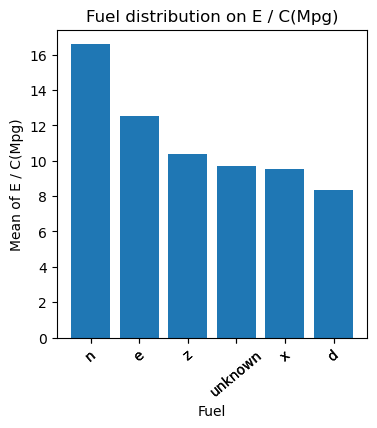

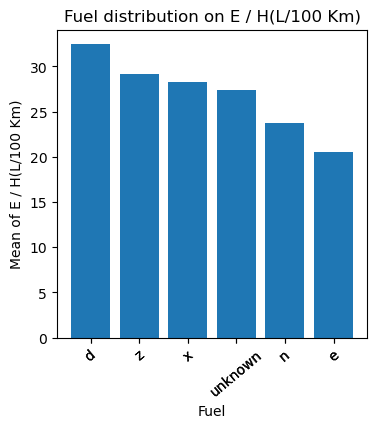

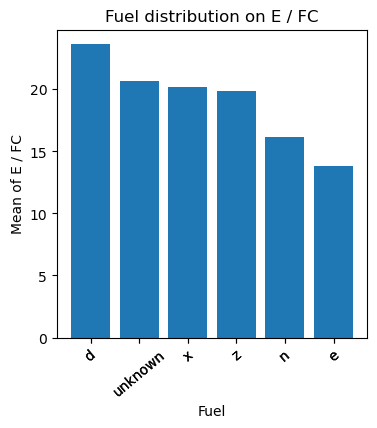

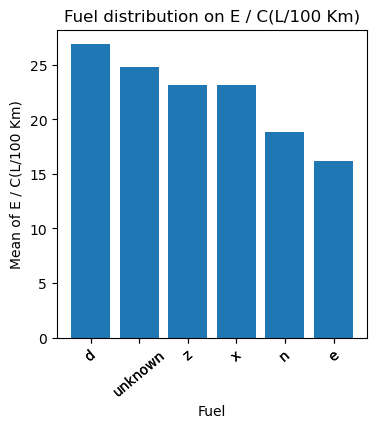

In [1357]:
for column in ['E / C(Mpg)', 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)']:
	Emission_divided_by_column = df_copy.groupby('Fuel')[column].agg(['mean']).reset_index().sort_values('mean', ascending=False)
	plt.figure(figsize=(4,4))
	plt.bar(Emission_divided_by_column['Fuel'].tolist(), Emission_divided_by_column['mean'].tolist())
	plt.title(f'Fuel distribution on {column}')
	plt.xlabel('Fuel')
	plt.ylabel(f'Mean of {column}')
	plt.xticks(Emission_divided_by_column['Fuel'].tolist() + Emission_divided_by_column['Fuel'].tolist(), rotation=40) 
	plt.show()

#### Top 5 Vehicle Class with most and least of E/FC

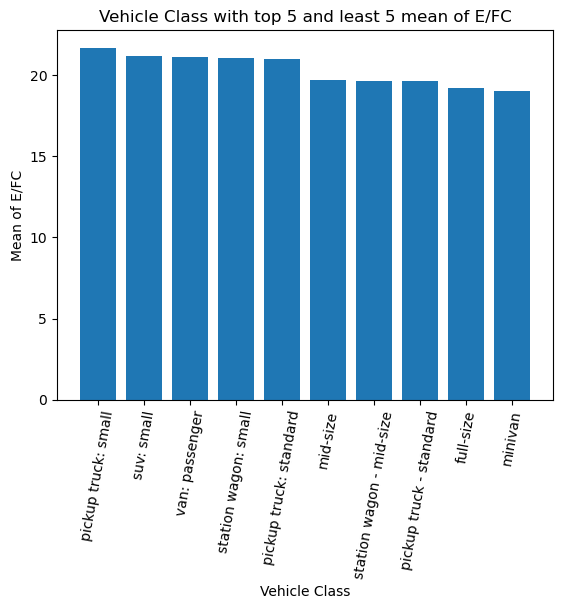

In [1358]:
Top_upper_5 = df_copy.groupby('Vehicle Class')['E / FC'].agg(['mean']).reset_index().sort_values('mean', ascending=False).head(5)
Top_lower_5 = df_copy.groupby('Vehicle Class')['E / FC'].agg(['mean']).reset_index().sort_values('mean', ascending=False).tail(5)
plt.bar(Top_upper_5['Vehicle Class'].tolist() + Top_lower_5['Vehicle Class'].tolist(), Top_upper_5['mean'].tolist() + Top_lower_5['mean'].tolist())
plt.title('Vehicle Class with top 5 and least 5 mean of E/FC')
plt.xlabel('Vehicle Class')
plt.ylabel('Mean of E/FC')
plt.xticks(Top_upper_5['Vehicle Class'].tolist() + Top_lower_5['Vehicle Class'].tolist(), rotation=80) 
plt.show()

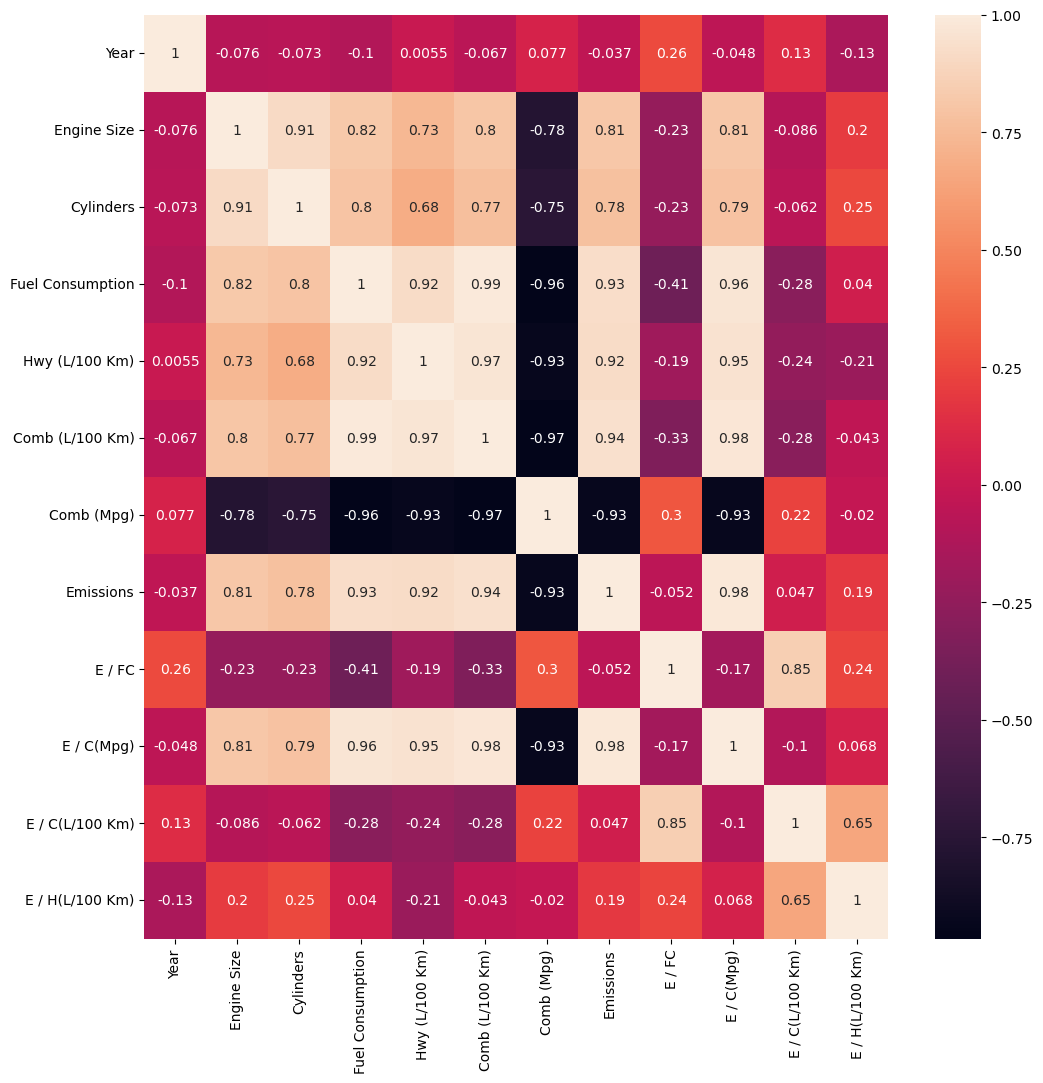

In [1359]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True)
plt.show()

### Conclusion:

#### General
1. There are missing values accross numerical values
2. What's the best imputation method to do this? (mean, median, or mode?)
3. Is there a column that is suitable to be converted into another dtype? why so? Year, because we want to use it for category + numerical, and univariate analysis
4. Is there cell with 0 values? No

#### Outliers
5. There are extreme values in the numerical columns (boxplot method)
6. Validated again using IQR and Z score, turns out they output different total of outliers each column
7. IQR method is way less, but using z scores some column such Year and Emissions claimed to have outliers with the same length of data (all data in year and emissions are outlier). This is because the standard deviation are high and the zscores of each data point is also very high. On the other hand, Zscore method claimed outlier when the zscore of the data point is above 3 or below -3.

#### Unique Values Normalization
8. Some categorical columns have unique values that are overlapped (meaning some are in lower while some in upper) this cause them to be classified as different group although they are the same when normalized

#### Standard Deviation
10. The std of each column are now different after eliminating the outliers
11. Although Emissions outlier has been removed, it stil has the biggest std (this is because their huge deviations)
12. From the boxplot of all columns (not independently visualize) The emissions does have the biggest range in values, this mean it has large range of data point spread out
13. while others have small (almost forming a line) range
14. Outliers are still shown in the 2nd iteration even after eliminating it again, we didn't remove it just to add little noise or variation to our dataset

#### Transmission
15. Transmission A4 has several type of Fuel Types, burt Fuel Type 'x' is the most frequent in transmission A4 and in all transmissions category
16. From the pie plot individual visualization of transmission and all numerical values, Distribution of Transmission in Year is dominated with data above average, this mean mostly the transmission is used on the year above 2011 (the mean of year) 

#### Fuel
17. Fuel type 'e' has several transmission, but 'A4' is the most frequent in the 'e' fuel type and across the fuel types
18. Fuel type 'n' has relatively big values in all numerical columns, one of it is in engine size and fuel consumption as well as emissions
19. Fueal type has 'unknown' type

#### Fuel Consumption
20. Max fuel consumption is 20.9
21. Minimun and maximum of emissions produced by max fuel is 272 and 391, while the mean is 349
22. based on scatter plot of emission and fuel consumption spread:
- Fuel type 'e' has lower in emission production
- fuel type 'x' and 'z' relatively the same in increasing emission production
- Fuel type 'd' generates emission the most
23. Through combinition of Emissions devided by 'E / C(Mpg)', 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)'
- 'E / C(Mpg)', least producing is smart, and most is ferrari
- 'E / H(L/100 Km)', least producing is bugatti, and most is bentley
- 'E / FC', least producing is bugatti, and most is smart
- 'E / C(L/100 Km)', least producing is bugatti, and most is genesis

#### Fuel Type on 'E / C(Mpg)', 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)'
24. type 'n' is the highest in 'E / C(Mpg)'
25. type 'n' is the highest in 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)'
26. type 'e' is the lowest in 'E / H(L/100 Km)', 'E / FC', 'E / C(L/100 Km)'

## Pre - Processing
0. Normalization data columns
1. Handling Missing Values
2. Handling Duplications
3. Handling Outliers (IQR 1st iteration)
4. Checking Other Anomalies in each column
5. Normalization values
6. Feature Scaling
7. Feature Extraction

In [1360]:
df.head()

YEAR     MAKE                    MODEL            VEHICLE CLASS  \
0  2003.0     FORD  EXPLORER SPORT TRAC 4X4  PICKUP TRUCK - STANDARD   
1  2000.0   DAEWOO                    LANOS               SUBCOMPACT   
2  2018.0    Honda              Civic Sedan                 Mid-size   
3  2008.0     SAAB    9-3 CONVERTIBLE TURBO               SUBCOMPACT   
4  2005.0  HYUNDAI               TUCSON AWD                      SUV   

   ENGINE SIZE  CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  \
0          4.0        6.0           A5    X              15.4            10.7   
1          1.5        4.0           A4    X               9.9             5.9   
2          2.0        4.0           AV    X               7.8             6.0   
3          2.8        6.0          AS6    Z              14.5             8.3   
4          2.7        6.0           A4    X              12.3             8.8   

   COMB (L/100 km)  COMB (mpg)  EMISSIONS  E / FC  
0             13.3        21.0      306.0    19.9  
1              8.1        35.0      186.0    18.8  
2              7.0        40.0      163.0    20.9  
3             11.7        24.0      269.0    18.6  
4             10.7        26.0      246.0    20.0

In [1361]:
df.columns = df.columns.str.title()
df = df.drop('E / Fc', axis=1)

In [1362]:
df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions'],
      dtype='object')

In [1363]:
df[object_columns] = df[object_columns].apply(lambda x: x.str.lower())

In [1364]:
df = df.rename(columns={'Fuel Consumption':'City (L/100 Km)'})

In [1365]:
df['Balance Comb (L/100 Km)'] = round((df['City (L/100 Km)'] * 0.5) + (df['Hwy (L/100 Km)'] * 0.5),1)

In [1366]:
df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'City (L/100 Km)', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions',
       'Balance Comb (L/100 Km)'],
      dtype='object')

In [1367]:
df['Year'] = df['Year'].astype(object)

In [1368]:
columns_new_order = ['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'City (L/100 Km)', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Balance Comb (L/100 Km)', 'Emissions',]

In [1369]:
df = df[columns_new_order]

In [1370]:
df.head(3)

Year    Make                    Model            Vehicle Class  \
0  2003.0    ford  explorer sport trac 4x4  pickup truck - standard   
1  2000.0  daewoo                    lanos               subcompact   
2  2018.0   honda              civic sedan                 mid-size   

   Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x             15.4            10.7   
1          1.5        4.0           a4    x              9.9             5.9   
2          2.0        4.0           av    x              7.8             6.0   

   Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  Emissions  
0             13.3        21.0                     13.0      306.0  
1              8.1        35.0                      7.9      186.0  
2              7.0        40.0                      6.9      163.0

In [1371]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
object_columns = df.select_dtypes(include='object').columns.tolist()

In [1372]:
for column in object_columns:
     print(column)
     print(f'Total of unique values: {df[column].nunique()}')

Year
Total of unique values: 54
Make
Total of unique values: 53
Model
Total of unique values: 3731
Vehicle Class
Total of unique values: 25
Transmission
Total of unique values: 31
Fuel
Total of unique values: 6


In [1373]:
df.isna().sum()

Year                       47
Make                        0
Model                       0
Vehicle Class               0
Engine Size                40
Cylinders                  47
Transmission                0
Fuel                        0
City (L/100 Km)            46
Hwy (L/100 Km)             52
Comb (L/100 Km)            40
Comb (Mpg)                 49
Balance Comb (L/100 Km)    89
Emissions                  40
dtype: int64

In [1374]:
# handling missing values in numeric columns
for column in numeric_columns:
	df[column].fillna(df[column].median(), inplace=True)

# handling missing values in object columns
for column in object_columns:
     df[column].fillna(df[column].mode()[0], inplace=True)

/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_3292/2890889794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_3292/2890889794.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [1375]:
df.head()

Year     Make                    Model            Vehicle Class  \
0  2003.0     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000.0   daewoo                    lanos               subcompact   
2  2018.0    honda              civic sedan                 mid-size   
3  2008.0     saab    9-3 convertible turbo               subcompact   
4  2005.0  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x             15.4            10.7   
1          1.5        4.0           a4    x              9.9             5.9   
2          2.0        4.0           av    x              7.8             6.0   
3          2.8        6.0          as6    z             14.5             8.3   
4          2.7        6.0           a4    x             12.3             8.8   

   Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  Emissions  
0             13.3        21.0                     13.0      306.0  
1              8.1        35.0                      7.9      186.0  
2              7.0        40.0                      6.9      163.0  
3             11.7        24.0                     11.4      269.0  
4             10.7        26.0                     10.6      246.0

In [1376]:
df.duplicated().sum()

1

In [1377]:
df.drop_duplicates()

Year     Make                    Model            Vehicle Class  \
0      2003.0     ford  explorer sport trac 4x4  pickup truck - standard   
1      2000.0   daewoo                    lanos               subcompact   
2      2018.0    honda              civic sedan                 mid-size   
3      2008.0     saab    9-3 convertible turbo               subcompact   
4      2005.0  hyundai               tucson awd                      suv   
...       ...      ...                      ...                      ...   
22807  2011.0   subaru              impreza awd                  compact   
22808  2017.0     mini      cooper clubman all4                 mid-size   
22809  2006.0      gmc                   canyon  pickup truck - standard   
22810  2013.0     audi                       a3    station wagon - small   
22811  2000.0     ford                 explorer                      suv   

       Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  \
0              4.0        6.0           a5    x             15.4   
1              1.5        4.0           a4    x              9.9   
2              2.0        4.0           av    x              7.8   
3              2.8        6.0          as6    z             14.5   
4              2.7        6.0           a4    x             12.3   
...            ...        ...          ...  ...              ...   
22807          2.5        4.0           m6    z             12.4   
22808          1.5        3.0          as8    z             10.2   
22809          2.8        4.0           a4    x             13.7   
22810          2.0        4.0          as6    z              9.4   
22811          5.0        8.0           a4    x             16.6   

       Hwy (L/100 Km)  Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  \
0                10.7             13.3        21.0                     13.0   
1                 5.9              8.1        35.0                      7.9   
2                 6.0              7.0        40.0                      6.9   
3                 8.3             11.7        24.0                     11.4   
4                 8.8             10.7        26.0                     10.6   
...               ...              ...         ...                      ...   
22807             8.8             10.8        26.0                     10.6   
22808             7.8              9.1        31.0                      9.0   
22809             9.2             11.7        24.0                     11.4   
22810             6.9              8.3        34.0                      8.2   
22811            11.2             14.2        20.0                     13.9   

       Emissions  
0          306.0  
1          186.0  
2          163.0  
3          269.0  
4          246.0  
...          ...  
22807      248.0  
22808      213.0  
22809      269.0  
22810      191.0  
22811      327.0  

[22811 rows x 14 columns]

In [1378]:
print('Before dropping outliers')
df.shape[0]

Before dropping outliers


22812

In [1379]:
for column in numeric_columns:
     lower, upper, outliers = interquartile(df, column)
     outliers_indices = df[(df[column] < lower) | (df[column] > upper)].index
     df.drop(index=outliers_indices, errors='ignore', inplace=True)

In [1380]:
print('After dropping outliers')
df.shape[0]

After dropping outliers


21205

checking other anomalies in the columns [object columns]

In [1381]:
for column in object_columns:
     print(column)
     print(f'Total Unique Values {df[column].nunique()}')
     display(df[column].unique())

Year
Total Unique Values 35


array([ 2.003e+03,  2.000e+03,  2.018e+03,  2.008e+03,  2.005e+03,
        2.013e+03,  2.016e+03,  2.007e+03,  2.011e+03,  2.019e+03,
        2.004e+03,  2.015e+03,  2.002e+03,  2.021e+03,  2.001e+03,
        2.006e+03,  2.012e+03,  2.020e+03,  2.009e+03,  2.022e+03,
        2.017e+03,  2.010e+03,  2.014e+03, -9.300e+01, -6.300e+01,
       -8.200e+01, -2.000e+00, -1.800e+01, -2.500e+01, -2.300e+01,
       -1.500e+01, -7.000e+00, -4.900e+01, -8.400e+01, -4.000e+01])

Make
Total Unique Values 52


array(['ford', 'daewoo', 'honda', 'saab', 'hyundai', 'nissan', 'kia',
       'pontiac', 'gmc', 'chevrolet', 'dodge', 'porsche', 'unknown',
       'ram', 'toyota', 'audi', 'buick', 'mazda', 'cadillac', 'bmw',
       'subaru', 'mercedes-benz', 'jeep', 'chrysler', 'mitsubishi',
       'mini', 'volvo', 'jaguar', 'lexus', 'oldsmobile', 'acura',
       'infiniti', 'maserati', 'land rover', 'volkswagen', 'saturn',
       'aston martin', 'bentley', 'lamborghini', 'lincoln', 'suzuki',
       'fiat', 'isuzu', 'alfa romeo', 'scion', 'rolls-royce', 'genesis',
       'hummer', 'ferrari', 'smart', 'plymouth', 'bugatti'], dtype=object)

Model
Total Unique Values 3563


array(['explorer sport trac 4x4', 'lanos', 'civic sedan', ...,
       'mazdaspeed protege turbo', 'cx-5 ', 'gr supra'], dtype=object)

Vehicle Class
Total Unique Values 25


array(['pickup truck - standard', 'subcompact', 'mid-size', 'suv',
       'pickup truck - small', 'full-size', 'compact', 'minivan',
       'pickup truck: standard', 'minicompact', 'van - passenger',
       'suv: small', 'two-seater', 'station wagon - small', 'suv - small',
       'suv: standard', 'special purpose vehicle', 'pickup truck: small',
       'station wagon - mid-size', 'suv - standard',
       'station wagon: small', 'van: passenger', 'van - cargo',
       'station wagon: mid-size', 'unknown'], dtype=object)

Transmission
Total Unique Values 31


array(['a5', 'a4', 'av', 'as6', 'm6', 'as8', 'a6', 'as5', 'a8', 'm5',
       'a10', 'as4', 'a9', 'av8', 'as7', 'av6', 'as10', 'am7', 'am6',
       'm7', 'a7', 'as9', 'av7', 'am8', 'unknown', 'av10', 'am9', 'av1',
       'a3', 'm4', 'am5'], dtype=object)

Fuel
Total Unique Values 6


array(['x', 'z', 'e', 'd', 'n', 'unknown'], dtype=object)

in column Vehicle class, Transmission and Fuel there is Unknown. Since there lots of unique values in model, let's check if there is unknown?

In [1382]:
df[df['Model'] == 'unknown']

Year           Make    Model            Vehicle Class  Engine Size  \
3158   2002.0        unknown  unknown                  unknown          5.0   
3593   2008.0       infiniti  unknown                  compact          3.5   
5405   2015.0      chevrolet  unknown                  unknown          3.5   
6168    -93.0  mercedes-benz  unknown            suv: standard          4.0   
7247   2013.0        unknown  unknown               subcompact          6.4   
8450   2022.0        unknown  unknown               two-seater          1.4   
8465   2012.0        porsche  unknown                  unknown          2.5   
9005   2000.0        unknown  unknown                 mid-size          6.2   
10042  2015.0        unknown  unknown               two-seater          6.0   
10684   -18.0  mercedes-benz  unknown                  unknown          4.7   
11636  2006.0        unknown  unknown                  unknown          3.0   
12176  2015.0        bugatti  unknown              suv - small          1.4   
12397  2015.0        hyundai  unknown                 mid-size          1.8   
12416  2020.0           ford  unknown     pickup truck - small          3.4   
14814  2007.0         toyota  unknown                  compact          6.2   
15059    -7.0        pontiac  unknown                      suv          2.3   
15686  2013.0           ford  unknown                  compact          3.0   
16187  2014.0        lincoln  unknown                  compact          4.2   
17163  2017.0         subaru  unknown                  unknown          3.0   
17542  2005.0        unknown  unknown                  compact          4.0   
18138  2016.0            bmw  unknown                  unknown          3.0   
18922  2014.0           ford  unknown  pickup truck - standard          5.9   

       Cylinders Transmission     Fuel  City (L/100 Km)  Hwy (L/100 Km)  \
3158         6.0           m6        x             12.3             8.4   
3593         6.0           m6        x              9.2             8.4   
5405         6.0           a9        z             16.2            11.7   
6168         6.0      unknown  unknown              9.3            13.1   
7247         6.0      unknown        x             10.0             7.3   
8450         6.0           a4        x             11.8            11.4   
8465         4.0      unknown  unknown              8.4            11.1   
9005         6.0           a5        x             16.0             9.0   
10042        4.0           m6        z             16.0             8.4   
10684        4.0           m6        z             11.4             9.1   
11636        6.0          as5  unknown             17.0             7.2   
12176        6.0          as6  unknown             20.1            12.1   
12397        6.0      unknown        z              9.1             8.1   
12416        4.0           a6  unknown             12.3             8.4   
14814        6.0           a6        z             12.3             8.5   
15059        8.0           a4        x             14.6             8.5   
15686        8.0           m5  unknown             10.3            12.6   
16187        8.0           a6        z             14.1             9.4   
17163        8.0      unknown  unknown             12.3             8.4   
17542        4.0           a7  unknown             12.3             6.7   
18138        6.0           a7        z             13.0             6.4   
18922        6.0           a6        x              8.1             7.6   

       Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  Emissions  
3158               9.8        27.0                     10.4      232.0  
3593              12.1        27.0                     10.4      242.0  
5405              10.9        26.0                     14.0      242.0  
6168               6.5        27.0                     11.2      218.0  
7247              14.7        20.0                      8.6      234.0  
8450              10.5     

let's check the unknown for each of the categorical columns

In [1383]:
for column in object_columns:
     result = (df[column] == 'unknown').sum()
     print(column)
     print(f'Total of unknown values: {result} \n')

Year
Total of unknown values: 0 

Make
Total of unknown values: 17 

Model
Total of unknown values: 22 

Vehicle Class
Total of unknown values: 22 

Transmission
Total of unknown values: 21 

Fuel
Total of unknown values: 23 



#### rows with at least one categorical columns 'unknown'

In [1384]:
result = (df[object_columns] == 'unknown').any(axis=1)
print(f'Total rows at least one categorical columns is \'unknown\': {result.sum()}')
display(df[result])

Total rows at least one categorical columns is 'unknown': 55


Year           Make                     Model  \
14     2015.0        unknown                s90 t6 awd   
333    2015.0        unknown                 tahoe 4wd   
1462   2016.0           ford                    x-type   
1798   2013.0          isuzu         grand caravan ffv   
1932   2004.0            kia                 b4000 4x4   
3158   2002.0        unknown                   unknown   
3593   2008.0       infiniti                   unknown   
4999   2022.0        unknown                    mazda6   
5382   2002.0     volkswagen               c 320cl ffv   
5405   2015.0      chevrolet                   unknown   
6168    -93.0  mercedes-benz                   unknown   
7247   2013.0        unknown                   unknown   
7250   2003.0            bmw  john cooper works 3 door   
7312    -63.0            bmw                pathfinder   
7592    -82.0        pontiac                       brz   
7863   2007.0        porsche          k1500 sierra 4x4   
8450   2022.0        unknown                   unknown   
8465   2012.0        porsche                   unknown   
8848   2008.0            ram                     forte   
9005   2000.0        unknown                   unknown   
9683   2018.0         toyota                  9-7x awd   
10042  2015.0        unknown                   unknown   
10684   -18.0  mercedes-benz                   unknown   
11636  2006.0        unknown                   unknown   
11661  2018.0        unknown                    chiron   
12176  2015.0        bugatti                   unknown   
12397  2015.0        hyundai                   unknown   
12416  2020.0           ford                   unknown   
12686  2015.0  mercedes-benz               rx 450h awd   
13195  2008.0        unknown                  cx-5 4wd   
14485  2017.0          buick                   genesis   
14699  2021.0        unknown                 g37 coupe   
14814  2007.0         toyota                   unknown   
15044   -15.0          lexus            pathfinder 4x4   
15059    -7.0        pontiac                   unknown   
15686  2013.0           ford                   unknown   
16187  2014.0        lincoln                   unknown   
16219  2004.0        unknown                    tl awd   
16375  2012.0        unknown            335i cabriolet   
16749  2017.0          buick                   forte 5   
17163  2017.0         subaru                   unknown   
17364   -49.0  mercedes-benz                sierra 4wd   
17542  2005.0        unknown                   unknown   
17611  2014.0        unknown                   rdx awd   
18138  2016.0            bmw                   unknown   
18922  2014.0           ford                   unknown   
19574   -84.0          dodge    grand cherokee 4x4 srt   
19998  2001.0            gmc           frontier v6 4x4   
21002   -40.0           mini                      cr-v   
21559  2015.0           audi               montero 4x4   
21579  2018.0     volkswagen                 cayenne s   
21607  2007.0            ram              savana cargo   
21857  2011.0        unknown              x5 xdrive50i   
22110  2015.0      chevrolet                 titan 4wd   
22565  2015.0         toyota                   sonic 5   

                 Vehicle Class  Engine Size  Cylinders Transmission     Fuel  \
14                     compact          5.3        6.0          as6        x   
333                  full-size          3.0        8.0      unknown        x   
1462                   unknown          5.3        6.0      unknown  unknown   
1798     station wagon - small          3.7        6.0      unknown  unknown   
1932                   unknown          2.5        4.0           a9        x   
3158                   unknown          5.0        6.0           m6        x   
3593                   compact          3.5        6.0           m6        x   
4999                  mid-size          5.6        8.0           a4        x   
5382                   unknown          

#### rows with all categorical columns 'unknown'

In [1385]:
result = (df[object_columns] == 'unknown').all(axis=1)
print(f'Total rows at least one categorical columns is \'unknown\': {result.sum()}')
display(df[result])

Total rows at least one categorical columns is 'unknown': 0


Empty DataFrame
Columns: [Year, Make, Model, Vehicle Class, Engine Size, Cylinders, Transmission, Fuel, City (L/100 Km), Hwy (L/100 Km), Comb (L/100 Km), Comb (Mpg), Balance Comb (L/100 Km), Emissions]
Index: []

#### rows with 4/5 categorical columns 'unknown'

In [1386]:
result = (df[object_columns] == 'unknown').sum(axis=1)
result = (result == 4)
print(f'Total rows at least one categorical columns is \'unknown\': {result.sum()}')
display(df[result])

Total rows at least one categorical columns is 'unknown': 3


Year     Make    Model Vehicle Class  Engine Size  Cylinders  \
8465   2012.0  porsche  unknown       unknown          2.5        4.0   
11636  2006.0  unknown  unknown       unknown          3.0        6.0   
17163  2017.0   subaru  unknown       unknown          3.0        8.0   

      Transmission     Fuel  City (L/100 Km)  Hwy (L/100 Km)  Comb (L/100 Km)  \
8465       unknown  unknown              8.4            11.1             11.1   
11636          as5  unknown             17.0             7.2              9.3   
17163      unknown  unknown             12.3             8.4             10.5   

       Comb (Mpg)  Balance Comb (L/100 Km)  Emissions  
8465         18.0                      9.8      242.0  
11636        35.0                     12.1      253.0  
17163        24.0                     10.4      219.0

strategy of handling:
1. Using KNN based on the numerical values
2. if all the categorical cells in the row are unknown, then drop

In [1387]:
df.head()

Year     Make                    Model            Vehicle Class  \
0  2003.0     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000.0   daewoo                    lanos               subcompact   
2  2018.0    honda              civic sedan                 mid-size   
3  2008.0     saab    9-3 convertible turbo               subcompact   
4  2005.0  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x             15.4            10.7   
1          1.5        4.0           a4    x              9.9             5.9   
2          2.0        4.0           av    x              7.8             6.0   
3          2.8        6.0          as6    z             14.5             8.3   
4          2.7        6.0           a4    x             12.3             8.8   

   Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  Emissions  
0             13.3        21.0                     13.0      306.0  
1              8.1        35.0                      7.9      186.0  
2              7.0        40.0                      6.9      163.0  
3             11.7        24.0                     11.4      269.0  
4             10.7        26.0                     10.6      246.0

In [1388]:
numeric_columns

['Engine Size',
 'Cylinders',
 'City (L/100 Km)',
 'Hwy (L/100 Km)',
 'Comb (L/100 Km)',
 'Comb (Mpg)',
 'Balance Comb (L/100 Km)',
 'Emissions']

#### Visualize each of the categorical columns based on Year, Engine Size, Cylinders, Balance Comb, Emissions, we're goin to select the columns which distirbute the categorical better

In [1389]:
df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'City (L/100 Km)', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Balance Comb (L/100 Km)',
       'Emissions'],
      dtype='object')

In [1390]:
pairplot_columns = ['Make', 'Model', 'Transmission', 'Fuel', 'Vehicle Class', 'Engine Size', 'Cylinders', 'Comb (L/100 Km)', 'Emissions']

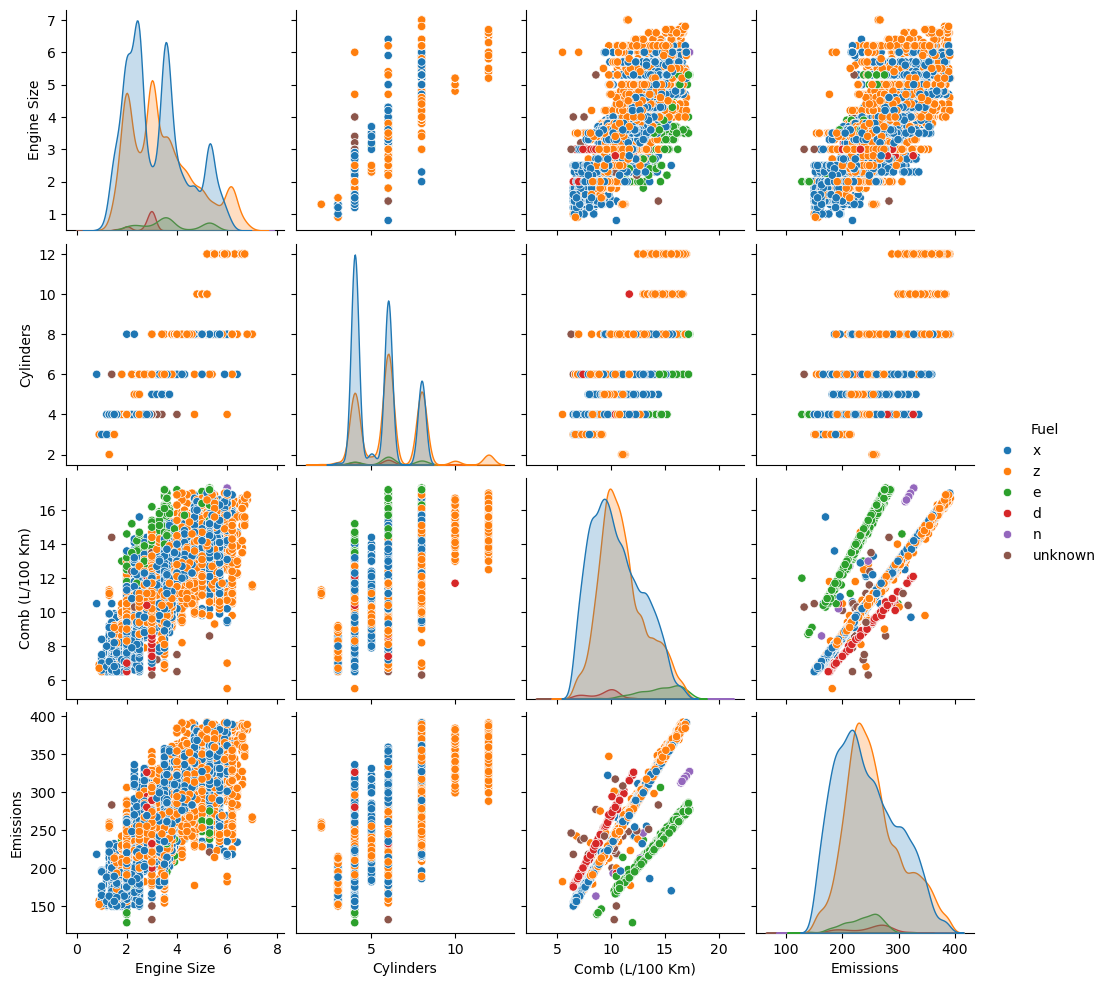

In [1391]:
sns.pairplot(df[pairplot_columns], hue='Fuel')

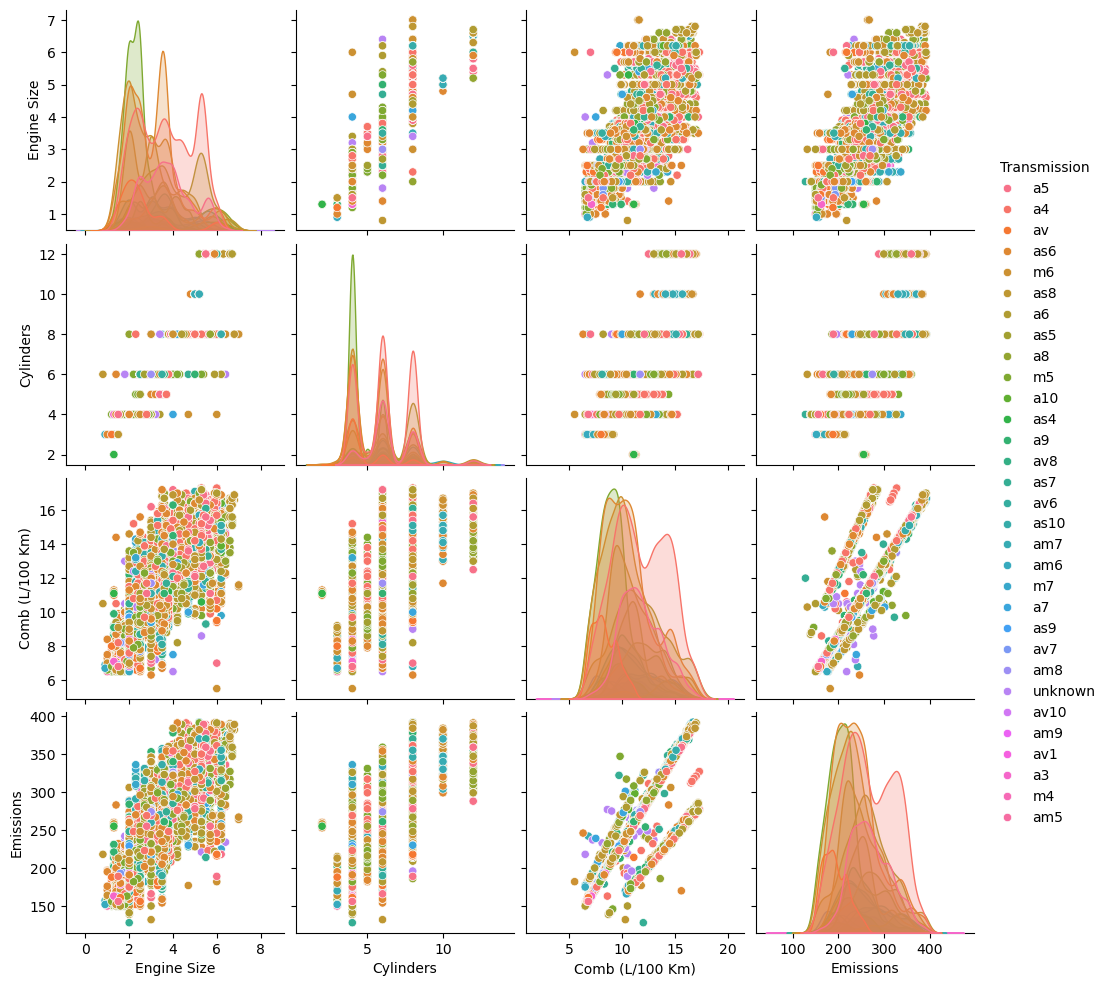

In [1392]:
sns.pairplot(df[pairplot_columns], hue='Transmission')

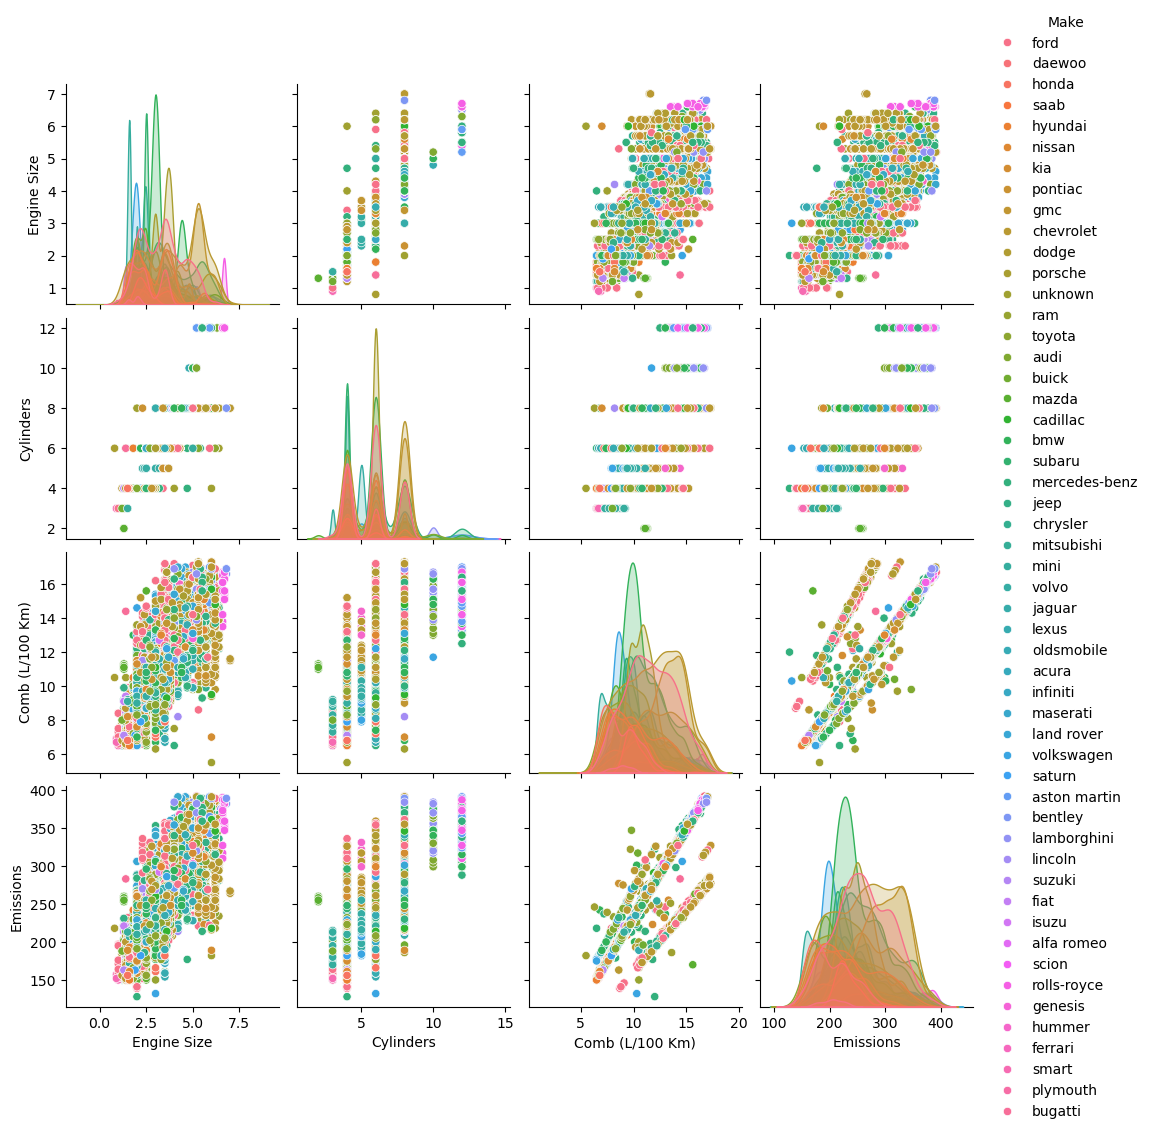

In [1393]:
sns.pairplot(df[pairplot_columns], hue='Make')

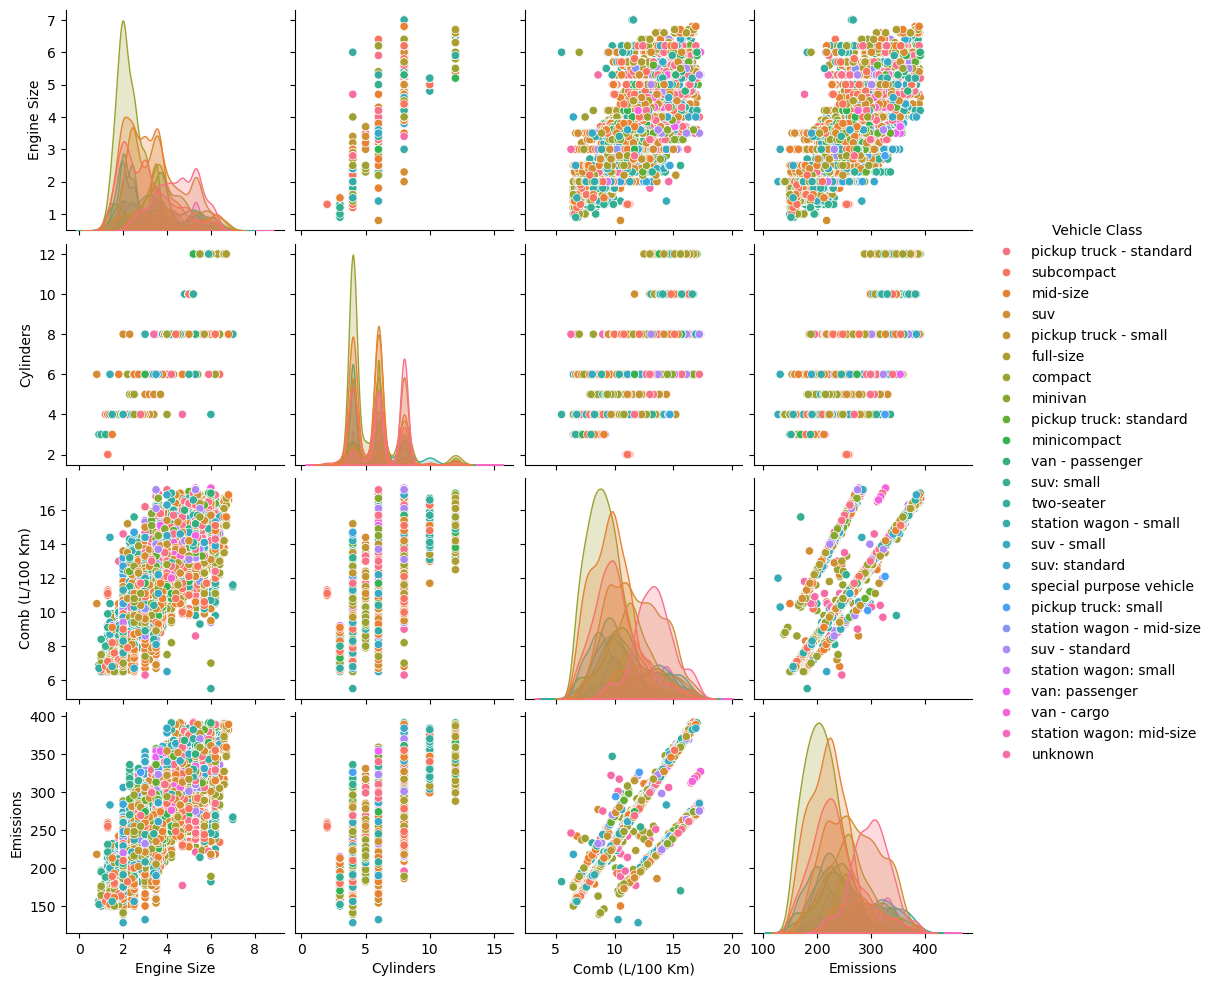

In [1394]:
sns.pairplot(df[pairplot_columns], hue='Vehicle Class')

In [1395]:
df['Model'].nunique()

3563

Since model's total unique values is large, we are not going to visualize it using pairplot

Categorical column that's easy to classify because it's distirbution is 'Fuel' with 'Comb (L/100 Km)'

In [1396]:
def train_test_split(X, y, test_size):
     indices = np.arange(X.shape[0])
     np.random.shuffle(indices)
     
     test_count = int(test_size * X.shape[0])
     test = indices[:test_count]
     train = indices[test_count:]
     
     X_train, X_test = X.iloc[train], X.iloc[test]
     y_train, y_test = y.iloc[train], y.iloc[test]
     
     return X_train, X_test, y_train, y_test
     

In [1397]:
df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'City (L/100 Km)', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Balance Comb (L/100 Km)',
       'Emissions'],
      dtype='object')

<Axes: >

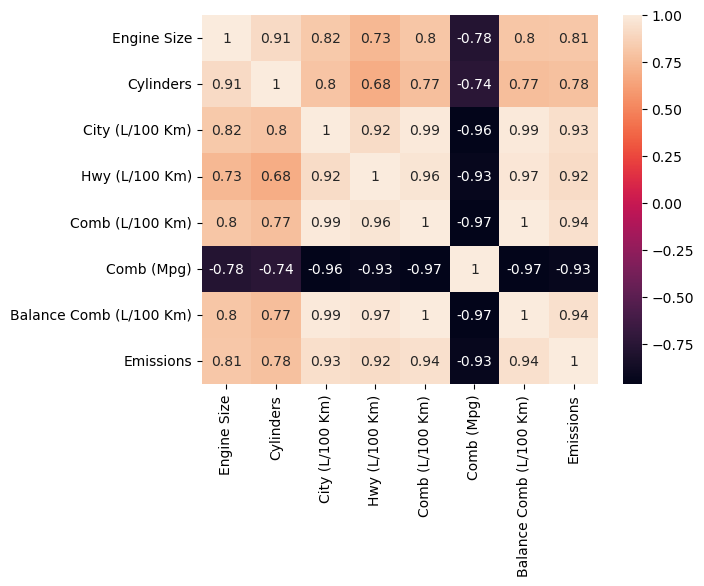

In [1398]:
sns.heatmap(df[numeric_columns].corr(), annot=True)

In [1399]:
df_cleaned_from_unknown = df[~(df == 'unknown').any(axis=1)]

In [1400]:
(df_cleaned_from_unknown == 'unknown').any(axis=1).sum()

0

In [1401]:
X = df_cleaned_from_unknown[['Engine Size', 'Cylinders', 'City (L/100 Km)', \
      'Hwy (L/100 Km)', 'Comb (L/100 Km)', 'Comb (Mpg)', 'Balance Comb (L/100 Km)', 'Emissions']]

In [1402]:
y = df_cleaned_from_unknown['Fuel']

In [1403]:
(df_cleaned_from_unknown == 0).any(axis=1).sum()

0

In [1404]:
df_cleaned_from_unknown.isna().sum()

Year                       0
Make                       0
Model                      0
Vehicle Class              0
Engine Size                0
Cylinders                  0
Transmission               0
Fuel                       0
City (L/100 Km)            0
Hwy (L/100 Km)             0
Comb (L/100 Km)            0
Comb (Mpg)                 0
Balance Comb (L/100 Km)    0
Emissions                  0
dtype: int64

In [1405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1406]:
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [1407]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16920, 8) (4230, 8) (16920,) (4230,)


In [1408]:
numeric_columns_without_year = ['Engine Size',
 'Cylinders',
 'City (L/100 Km)',
 'Hwy (L/100 Km)',
 'Comb (L/100 Km)',
 'Comb (Mpg)',
 'Balance Comb (L/100 Km)',
 'Emissions']

In [1409]:
unknown_fuel = df[df['Fuel'] == 'unknown'][numeric_columns_without_year]

In [1410]:
unknown_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1462 to 22565
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Size              23 non-null     float64
 1   Cylinders                23 non-null     float64
 2   City (L/100 Km)          23 non-null     float64
 3   Hwy (L/100 Km)           23 non-null     float64
 4   Comb (L/100 Km)          23 non-null     float64
 5   Comb (Mpg)               23 non-null     float64
 6   Balance Comb (L/100 Km)  23 non-null     float64
 7   Emissions                23 non-null     float64
dtypes: float64(8)
memory usage: 1.6 KB


In [1411]:
unknown_fuel_array = np.array(unknown_fuel)

In [1412]:
import numpy as np
from collections import Counter

class KNN:
     def __init__(self, k):
          self.k = k

     def fit(self, X_train, y_train):
          self.X_train = X_train
          self.y_train = y_train

     def euclidean_distance(self, point1, point2):
          # Correct Euclidean distance calculation
          return np.sqrt(np.sum((point1 - point2) ** 2))

     def get_neighbors(self, test_instance):
          distances = []
          for i in range(len(self.X_train)):  # Loop through all training samples
               dist = self.euclidean_distance(test_instance, self.X_train[i])
               distances.append((dist, self.y_train[i]))  # Store distance and target label

          # Sort distances in ascending order
          distances.sort(key=lambda x: x[0])
          
          # Get the labels of the k nearest neighbors
          neighbors = [distances[i][1] for i in range(self.k)]
          return neighbors

     def predict(self, X_test):
          predictions = []
          for test_instance in X_test:  # Loop through all test samples
               neighbors = self.get_neighbors(test_instance)
               # Determine the most common label among the neighbors
               most_common = Counter(neighbors).most_common(1)[0][0]
               predictions.append(most_common)
          return predictions


In [1413]:
modelKNN = KNN(k=3)
modelKNN.fit(X_train, y_train)

In [1414]:
predicted_fuel = modelKNN.predict(unknown_fuel_array)

In [1415]:
predicted_fuel

['e',
 'd',
 'x',
 'e',
 'd',
 'e',
 'x',
 'd',
 'e',
 'x',
 'x',
 'd',
 'x',
 'z',
 'x',
 'd',
 'd',
 'z',
 'e',
 'e',
 'e',
 'x',
 'x']

In [1416]:
unknown_fuel_indices = unknown_fuel.index.tolist()
unknown_fuel_indices

[1462,
 1798,
 6168,
 7312,
 7592,
 7863,
 8465,
 11636,
 12176,
 12416,
 12686,
 14485,
 15686,
 16219,
 17163,
 17542,
 17611,
 19574,
 21002,
 21579,
 21607,
 22110,
 22565]

In [1417]:
df.loc[unknown_fuel_indices, 'Fuel'] = predicted_fuel

In [1418]:
df.loc[unknown_fuel_indices]

Year           Make                   Model          Vehicle Class  \
1462   2016.0           ford                  x-type                unknown   
1798   2013.0          isuzu       grand caravan ffv  station wagon - small   
6168    -93.0  mercedes-benz                 unknown          suv: standard   
7312    -63.0            bmw              pathfinder                minivan   
7592    -82.0        pontiac                     brz                    suv   
7863   2007.0        porsche        k1500 sierra 4x4                compact   
8465   2012.0        porsche                 unknown                unknown   
11636  2006.0        unknown                 unknown                unknown   
12176  2015.0        bugatti                 unknown            suv - small   
12416  2020.0           ford                 unknown   pickup truck - small   
12686  2015.0  mercedes-benz             rx 450h awd   pickup truck - small   
14485  2017.0          buick                 genesis                unknown   
15686  2013.0           ford                 unknown                compact   
16219  2004.0        unknown                  tl awd                unknown   
17163  2017.0         subaru                 unknown                unknown   
17542  2005.0        unknown                 unknown                compact   
17611  2014.0        unknown                 rdx awd                unknown   
19574   -84.0          dodge  grand cherokee 4x4 srt                compact   
21002   -40.0           mini                    cr-v  station wagon - small   
21579  2018.0     volkswagen               cayenne s            suv - small   
21607  2007.0            ram            savana cargo               mid-size   
22110  2015.0      chevrolet               titan 4wd   pickup truck - small   
22565  2015.0         toyota                 sonic 5                unknown   

       Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  \
1462           5.3        6.0      unknown    e              9.8   
1798           3.7        6.0      unknown    d             11.3   
6168           4.0        6.0      unknown    x              9.3   
7312           2.8        6.0          as8    e             10.5   
7592           2.4        6.0      unknown    d             12.9   
7863           5.3        8.0      unknown    e             11.4   
8465           2.5        4.0      unknown    x              8.4   
11636          3.0        6.0          as5    d             17.0   
12176          1.4        6.0          as6    e             20.1   
12416          3.4        4.0           a6    x             12.3   
12686          3.2        4.0      unknown    x             12.9   
14485          3.8        8.0           a8    d             14.3   
15686          3.0        8.0           m5    x             10.3   
16219          3.0        8.0          as6    z             11.0   
17163          3.0        8.0      unknown    x             12.3   
17542          4.0        4.0           a7    d             12.3   
17611          3.0        4.0          as7    d              8.1   
19574          2.2        6.0      unknown    z              9.1   
21002          3.0        6.0           m6    e             11.7   
21579          3.0        6.0          as8    e             12.3   
21607          3.0        4.0           a6    e             12.3   
22110          3.6        6.0           a6    x             10.1   
22565          2.3        4.0      unknown    x             12.3   

       Hwy (L/100 Km)  Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  \
1462              8.4              8.6        18.0                     10.4   
1798              8.4             10.7        27.0                     10.4   
6168             13.1              6.5        27.0                     11.2   
7312             12.3             10.1        20.0                     11.4   
7592              7.7              8.6        27.0                     10.3   
7863 

now let's make a function instead to impute all the categorical cells that are 'unknown'

In [1419]:
for column in object_columns:
     unknown_column = df[df[column] == 'unknown'][numeric_columns_without_year]
     unknown_column_array = np.array(unknown_column)
     predicted_column = modelKNN.predict(unknown_column_array)
     unknown_column_indices = unknown_column.index.tolist()
     df.loc[unknown_column_indices, column] = predicted_column
     print(f'Imputing in column {column}')
     print((df[column] == 'unknown').sum())

Imputing in column Year
0
Imputing in column Make
0
Imputing in column Model
0
Imputing in column Vehicle Class
0
Imputing in column Transmission
0
Imputing in column Fuel
0


In [1420]:
print('Check if there are still "unknown" values in the categorical columns')
(df == 'unknown').sum()

Check if there are still "unknown" values in the categorical columns


Year                       0
Make                       0
Model                      0
Vehicle Class              0
Engine Size                0
Cylinders                  0
Transmission               0
Fuel                       0
City (L/100 Km)            0
Hwy (L/100 Km)             0
Comb (L/100 Km)            0
Comb (Mpg)                 0
Balance Comb (L/100 Km)    0
Emissions                  0
dtype: int64

In [1421]:
print('Checking all the unique values in categorical columns')
for column in object_columns:
     print(column)
     display(f'Total {df[column].nunique()}: {df[column].unique()}')
     print()

Checking all the unique values in categorical columns
Year


'Total 35: [ 2.003e+03  2.000e+03  2.018e+03  2.008e+03  2.005e+03  2.013e+03\n  2.016e+03  2.007e+03  2.011e+03  2.019e+03  2.004e+03  2.015e+03\n  2.002e+03  2.021e+03  2.001e+03  2.006e+03  2.012e+03  2.020e+03\n  2.009e+03  2.022e+03  2.017e+03  2.010e+03  2.014e+03 -9.300e+01\n -6.300e+01 -8.200e+01 -2.000e+00 -1.800e+01 -2.500e+01 -2.300e+01\n -1.500e+01 -7.000e+00 -4.900e+01 -8.400e+01 -4.000e+01]'


Make


"Total 55: ['ford' 'daewoo' 'honda' 'saab' 'hyundai' 'nissan' 'kia' 'pontiac' 'gmc'\n 'chevrolet' 'dodge' 'porsche' 'z' 'ram' 'toyota' 'audi' 'buick' 'mazda'\n 'cadillac' 'bmw' 'subaru' 'mercedes-benz' 'jeep' 'chrysler' 'mitsubishi'\n 'mini' 'volvo' 'jaguar' 'lexus' 'oldsmobile' 'acura' 'infiniti'\n 'maserati' 'land rover' 'volkswagen' 'saturn' 'aston martin' 'bentley'\n 'd' 'lamborghini' 'lincoln' 'suzuki' 'fiat' 'isuzu' 'alfa romeo' 'scion'\n 'rolls-royce' 'genesis' 'hummer' 'ferrari' 'smart' 'plymouth' 'x' 'e'\n 'bugatti']"


Model


"Total 3566: ['explorer sport trac 4x4' 'lanos' 'civic sedan' ...\n 'mazdaspeed protege turbo' 'cx-5 ' 'gr supra']"


Vehicle Class


"Total 28: ['pickup truck - standard' 'subcompact' 'mid-size' 'suv'\n 'pickup truck - small' 'full-size' 'compact' 'minivan'\n 'pickup truck: standard' 'minicompact' 'van - passenger' 'suv: small'\n 'two-seater' 'station wagon - small' 'suv - small' 'suv: standard'\n 'special purpose vehicle' 'pickup truck: small'\n 'station wagon - mid-size' 'suv - standard' 'station wagon: small'\n 'van: passenger' 'van - cargo' 'station wagon: mid-size' 'e' 'z' 'd' 'x']"


Transmission


"Total 34: ['a5' 'a4' 'av' 'as6' 'm6' 'as8' 'a6' 'as5' 'a8' 'm5' 'a10' 'as4' 'a9'\n 'av8' 'as7' 'av6' 'as10' 'am7' 'am6' 'm7' 'a7' 'as9' 'av7' 'am8' 'd' 'e'\n 'av10' 'am9' 'av1' 'a3' 'x' 'm4' 'z' 'am5']"


Fuel


"Total 5: ['x' 'z' 'e' 'd' 'n']"

In [1422]:
numeric_columns_without_year

['Engine Size',
 'Cylinders',
 'City (L/100 Km)',
 'Hwy (L/100 Km)',
 'Comb (L/100 Km)',
 'Comb (Mpg)',
 'Balance Comb (L/100 Km)',
 'Emissions']

In [1423]:
def minMaxScalar(data, column):
    min_val = min(data[column])
    max_val = max(data[column])
    return [(x - min_val) / (max_val - min_val) for x in data[column]]

In [1424]:
df_scaled_data = df.copy()

In [1425]:
df_scaled_data

Year     Make                    Model            Vehicle Class  \
0      2003.0     ford  explorer sport trac 4x4  pickup truck - standard   
1      2000.0   daewoo                    lanos               subcompact   
2      2018.0    honda              civic sedan                 mid-size   
3      2008.0     saab    9-3 convertible turbo               subcompact   
4      2005.0  hyundai               tucson awd                      suv   
...       ...      ...                      ...                      ...   
22807  2011.0   subaru              impreza awd                  compact   
22808  2017.0     mini      cooper clubman all4                 mid-size   
22809  2006.0      gmc                   canyon  pickup truck - standard   
22810  2013.0     audi                       a3    station wagon - small   
22811  2000.0     ford                 explorer                      suv   

       Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  \
0              4.0        6.0           a5    x             15.4   
1              1.5        4.0           a4    x              9.9   
2              2.0        4.0           av    x              7.8   
3              2.8        6.0          as6    z             14.5   
4              2.7        6.0           a4    x             12.3   
...            ...        ...          ...  ...              ...   
22807          2.5        4.0           m6    z             12.4   
22808          1.5        3.0          as8    z             10.2   
22809          2.8        4.0           a4    x             13.7   
22810          2.0        4.0          as6    z              9.4   
22811          5.0        8.0           a4    x             16.6   

       Hwy (L/100 Km)  Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  \
0                10.7             13.3        21.0                     13.0   
1                 5.9              8.1        35.0                      7.9   
2                 6.0              7.0        40.0                      6.9   
3                 8.3             11.7        24.0                     11.4   
4                 8.8             10.7        26.0                     10.6   
...               ...              ...         ...                      ...   
22807             8.8             10.8        26.0                     10.6   
22808             7.8              9.1        31.0                      9.0   
22809             9.2             11.7        24.0                     11.4   
22810             6.9              8.3        34.0                      8.2   
22811            11.2             14.2        20.0                     13.9   

       Emissions  
0          306.0  
1          186.0  
2          163.0  
3          269.0  
4          246.0  
...          ...  
22807      248.0  
22808      213.0  
22809      269.0  
22810      191.0  
22811      327.0  

[21205 rows x 14 columns]

In [1426]:
for column in numeric_columns_without_year:
     df_scaled_data[column] = minMaxScalar(df_scaled_data, column)

In [1427]:
df_scaled_data.head()

Year     Make                    Model            Vehicle Class  \
0  2003.0     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000.0   daewoo                    lanos               subcompact   
2  2018.0    honda              civic sedan                 mid-size   
3  2008.0     saab    9-3 convertible turbo               subcompact   
4  2005.0  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  Hwy (L/100 Km)  \
0     0.516129        0.4           a5    x         0.623288        0.623656   
1     0.112903        0.2           a4    x         0.246575        0.107527   
2     0.193548        0.2           av    x         0.102740        0.118280   
3     0.322581        0.4          as6    z         0.561644        0.365591   
4     0.306452        0.4           a4    x         0.410959        0.419355   

   Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  Emissions  
0         0.661017    0.185185                 0.622642   0.674242  
1         0.220339    0.703704                 0.141509   0.219697  
2         0.127119    0.888889                 0.047170   0.132576  
3         0.525424    0.296296                 0.471698   0.534091  
4         0.440678    0.370370                 0.396226   0.446970

In [1428]:
df.head()

Year     Make                    Model            Vehicle Class  \
0  2003.0     ford  explorer sport trac 4x4  pickup truck - standard   
1  2000.0   daewoo                    lanos               subcompact   
2  2018.0    honda              civic sedan                 mid-size   
3  2008.0     saab    9-3 convertible turbo               subcompact   
4  2005.0  hyundai               tucson awd                      suv   

   Engine Size  Cylinders Transmission Fuel  City (L/100 Km)  Hwy (L/100 Km)  \
0          4.0        6.0           a5    x             15.4            10.7   
1          1.5        4.0           a4    x              9.9             5.9   
2          2.0        4.0           av    x              7.8             6.0   
3          2.8        6.0          as6    z             14.5             8.3   
4          2.7        6.0           a4    x             12.3             8.8   

   Comb (L/100 Km)  Comb (Mpg)  Balance Comb (L/100 Km)  Emissions  
0             13.3        21.0                     13.0      306.0  
1              8.1        35.0                      7.9      186.0  
2              7.0        40.0                      6.9      163.0  
3             11.7        24.0                     11.4      269.0  
4             10.7        26.0                     10.6      246.0

## Modelling (Linear Regression)
1. Class linear regression ordinary least square:
	- init
	- fit
	- predict
	- mean absolute error
	- mean squared error
	- maan absolute percentage error
2. Class linear regression gradient descent:
	- init
	- fit (include loss function and updating parameters)
	- predict
	- mean absolute error
	- mean squared error
	- maan absolute percentage error
3. Visualization of linear regression OLS (include the scattered actual data, slope, intercept and residuals)
4. Visualization of linear regression gradient descent:
	- plotting (include the scattered actual data, slope, intercept and residuals)
	- accuracy plot and loss curve
5. Comprehension for scaled and unscaled independent variable
6. Learning rate decay: where learning rate reduce overtime (during the iteration) to slow down the covergence of the loss curve
7. Function to stop the iteration when the loss already get to the optimal minimum

In [1429]:
df.corr(numeric_only=True)

Year  Engine Size  Cylinders  City (L/100 Km)  \
Year                     1.000000    -0.005813  -0.010164        -0.008971   
Engine Size             -0.005813     1.000000   0.910894         0.821328   
Cylinders               -0.010164     0.910894   1.000000         0.799291   
City (L/100 Km)         -0.008971     0.821328   0.799291         1.000000   
Hwy (L/100 Km)          -0.001672     0.731336   0.683929         0.920619   
Comb (L/100 Km)         -0.007308     0.804121   0.772525         0.988198   
Comb (Mpg)               0.014741    -0.780070  -0.744720        -0.959182   
Balance Comb (L/100 Km) -0.007348     0.800878   0.768242         0.987278   
Emissions                0.007104     0.809391   0.784661         0.931027   

                         Hwy (L/100 Km)  Comb (L/100 Km)  Comb (Mpg)  \
Year                          -0.001672        -0.007308    0.014741   
Engine Size                    0.731336         0.804121   -0.780070   
Cylinders                      0.683929         0.772525   -0.744720   
City (L/100 Km)                0.920619         0.988198   -0.959182   
Hwy (L/100 Km)                 1.000000         0.964118   -0.927488   
Comb (L/100 Km)                0.964118         1.000000   -0.965487   
Comb (Mpg)                    -0.927488        -0.965487    1.000000   
Balance Comb (L/100 Km)        0.970497         0.997804   -0.965209   
Emissions                      0.919430         0.944035   -0.929938   

                         Balance Comb (L/100 Km)  Emissions  
Year                                   -0.007348   0.007104  
Engine Size                             0.800878   0.809391  
Cylinders                               0.768242   0.784661  
City (L/100 Km)                         0.987278   0.931027  
Hwy (L/100 Km)                          0.970497   0.919430  
Comb (L/100 Km)                         0.997804   0.944035  
Comb (Mpg)                             -0.965209  -0.929938  
Balance Comb (L/100 Km)                 1.000000   0.944556  
Emissions                               0.944556   1.000000

In [1430]:
from numpy import random

def train_test_split(X, y, test_size):
     indices = np.arange(X.shape[0])
     np.random.shuffle(indices)
     
     test_count = int(test_size * X.shape[0])
     test = indices[:test_count]
     train = indices[test_count:]
     
     X_train, X_test = X.iloc[train], X.iloc[test]
     y_train, y_test = y.iloc[train], y.iloc[test]
     
     return X_train, X_test, y_train, y_test

In [1431]:
class LinearRegressionOrdinaryLeastSquares:
     def __init__(self):
          self.slope = 0
          self.intercept = 0
          
     def fit(self, X, y):
          X_mean = np.mean(X)
          y_mean = np.mean(y)
          
          numerator = np.sum((X - X_mean) * (y - y_mean))
          denominator = np.sum((X - X_mean) ** 2)
          
          self.slope = numerator / denominator
          self.intercept = y_mean - self.slope * X_mean
          
     # to predict new instance
     def predict(self, x):
          return self.slope * x + self.intercept
     
     def meanAbsoluteError(self, y_pred, y_true):
          return np.mean(np.abs(y_true - y_pred))
     
     def meanSquareError(self, y_pred, y_true):
          return np.mean(np.sqrt(y_true - y_pred))
     
     def meanAbsolutePercentageError(self, y_pred, y_true):
          return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [1465]:
class LinearRegressionGradientDescent:
     def __init__(self, learning_rate, epochs):
          self.slope = 0.0
          self.intercept = 0.0
          self.lr = learning_rate
          self.epochs = epochs
          self.losses = []
          
     def fit(self, X, y):
          n_samples = len(X)
          
          for _ in range(self.epochs):
               y_pred = self.slope * X + self.intercept
               
               # saving the losses 
               loss = (1 / n_samples) * np.sum(X * (y - y_pred)) ** 2
               self.losses.append(loss) 
               
               # MSE
               descent_slope = (-2 / n_samples) * np.sum(X * (y - y_pred))
               descent_intercept = (-2 / n_samples) * np.sum(y - y_pred)
               
               # updating the parameters
               self.slope -= self.lr * descent_slope
               self.intercept -= self.lr * descent_intercept
               
          return y_pred
     
     def predict(self, x):
          return self.slope * x + self.intercept
     
     def meanAbsoluteError(self, y_pred, y_true):
          return np.mean(np.abs(y_true - y_pred))
     
     def meanSquareError(self, y_pred, y_true):
          return np.mean(np.sqrt(y_true - y_pred))
     
     def meanAbsolutePercentageError(self, y_pred, y_true):
          return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
     

In [1466]:
class MultipleLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        """
        Fit the model to the data using the normal equation.
        :param X: Feature matrix (numpy array), shape (n_samples, n_features)
        :param y: Target vector (numpy array), shape (n_samples,)
        """
        # Add a column of ones to X for the intercept
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Calculate coefficients using the normal equation
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """
        Predict using the linear model.
        :param X: Feature matrix (numpy array), shape (n_samples, n_features)
        :return: Predicted values (numpy array), shape (n_samples,)
        """
        if self.coefficients is None:
            raise ValueError("Model is not trained yet. Call `fit` first.")
        
        # Add a column of ones to X for the intercept
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.coefficients

### Linear Regression Ordinary Least Square

In [1467]:
numeric_columns

['Engine Size',
 'Cylinders',
 'City (L/100 Km)',
 'Hwy (L/100 Km)',
 'Comb (L/100 Km)',
 'Comb (Mpg)',
 'Balance Comb (L/100 Km)',
 'Emissions']

<Axes: >

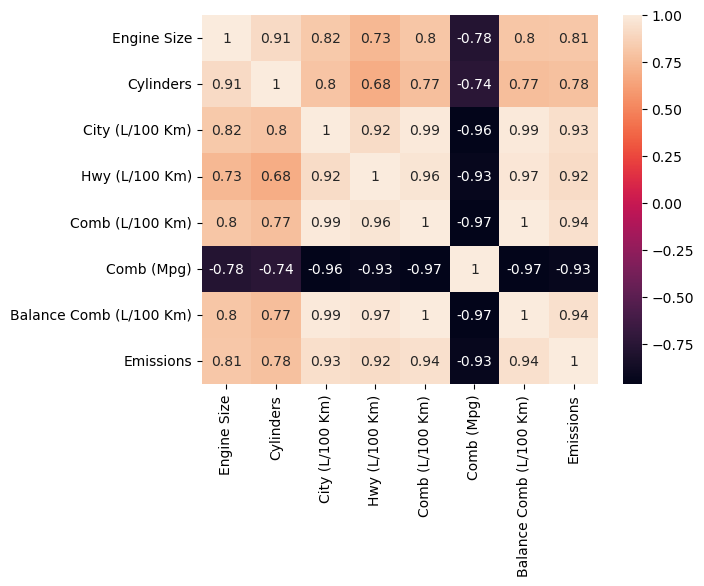

In [1468]:
sns.heatmap(df_scaled_data[numeric_columns].corr(), annot=True)

In [1469]:
df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'City (L/100 Km)', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Balance Comb (L/100 Km)',
       'Emissions'],
      dtype='object')

In [1470]:
X_linear_reg = df['Balance Comb (L/100 Km)']
y_linear_reg = df['Emissions']

In [1471]:
X_train_linear_reg, X_test_linear_reg, y_train_linear_reg, y_test_linear_reg = train_test_split(X_linear_reg, y_linear_reg, test_size=0.2)

In [1472]:
print(X_train_linear_reg.shape, X_test_linear_reg.shape, y_train_linear_reg.shape, y_test_linear_reg.shape)

(16964,) (4241,) (16964,) (4241,)


In [1473]:
modelOLS = LinearRegressionOrdinaryLeastSquares()
modelOLS.fit(X_train_linear_reg, y_train_linear_reg) 

In [1474]:
y_predOLS = modelOLS.predict(X_test_linear_reg) 
y_predOLS

13763    225.933163
3886     300.828926
15489    300.828926
8238     307.248563
9096     260.171226
            ...    
12227    238.772436
20626    247.331952
12512    230.212921
989      240.912315
19664    215.233768
Name: Balance Comb (L/100 Km), Length: 4241, dtype: float64

In [1475]:
y_test_linear_reg

13763    232.0
3886     308.0
15489    306.0
8238     219.0
9096     264.0
         ...  
12227    244.0
20626    248.0
12512    232.0
989      283.0
19664    214.0
Name: Emissions, Length: 4241, dtype: float64

In [1476]:
meanAbsoluteErrorOLS = modelOLS.meanAbsoluteError(y_predOLS, y_test_linear_reg)
print(f'Mean Absolute Error OLS: {meanAbsoluteErrorOLS}')

Mean Absolute Error OLS: 7.867880408524598


In [1477]:
meanAbsolutePercentageErrorOLS = modelOLS.meanAbsolutePercentageError(y_predOLS, y_test_linear_reg)
print(f'Mean Absolute Percentage Error {meanAbsolutePercentageErrorOLS:.2f}%')
print(f'The Accuracy of Slope: {100 - meanAbsolutePercentageErrorOLS:.2f}%')

Mean Absolute Percentage Error 3.19%
The Accuracy of Slope: 96.81%


### Linear Regression Gradient Descent

In [1478]:
modelGD = LinearRegressionGradientDescent(learning_rate=0.001, epochs=100)
modelGD.fit(X_train_linear_reg, y_train_linear_reg) 

19757    191.136244
18422    269.464164
17276    338.577034
3714     161.187334
7216     276.375451
            ...    
19968    211.870105
21749    202.655056
19962    218.781392
22611    278.679213
1550     283.286738
Name: Balance Comb (L/100 Km), Length: 16964, dtype: float64

In [1479]:
y_predGD = modelGD.predict(X_test_linear_reg) 

In [1480]:
y_predGD

13763    223.389142
3886     304.020316
15489    304.020316
8238     310.931560
9096     260.249107
            ...    
12227    237.211629
20626    246.426620
12512    227.996638
989      239.515377
19664    211.870403
Name: Balance Comb (L/100 Km), Length: 4241, dtype: float64

In [1481]:
y_test_linear_reg

13763    232.0
3886     308.0
15489    306.0
8238     219.0
9096     264.0
         ...  
12227    244.0
20626    248.0
12512    232.0
989      283.0
19664    214.0
Name: Emissions, Length: 4241, dtype: float64

In [1482]:
meanAbsoluteErrorGD = modelGD.meanAbsoluteError(y_predGD, y_test_linear_reg)
print(f'Mean Absolute Error OLS: {meanAbsoluteErrorGD}')

Mean Absolute Error OLS: 6.796595847859987


In [1483]:
meanAbsolutePercentageErrorGD = modelGD.meanAbsolutePercentageError(y_predGD, y_test_linear_reg)
print(f'Mean Absolute Percentage Error {meanAbsolutePercentageErrorGD:.2f}%')
print(f'The Accuracy of Slope: {100 - meanAbsolutePercentageErrorGD:.2f}%')

Mean Absolute Percentage Error 2.77%
The Accuracy of Slope: 97.23%


### Visualization of linear regression gradient descent
- plotting (include the scattered actual data, slope, intercept and residuals)
- accuracy plot and loss curve

ValueError: operands could not be broadcast together with shapes (16920,) (16920,8) 

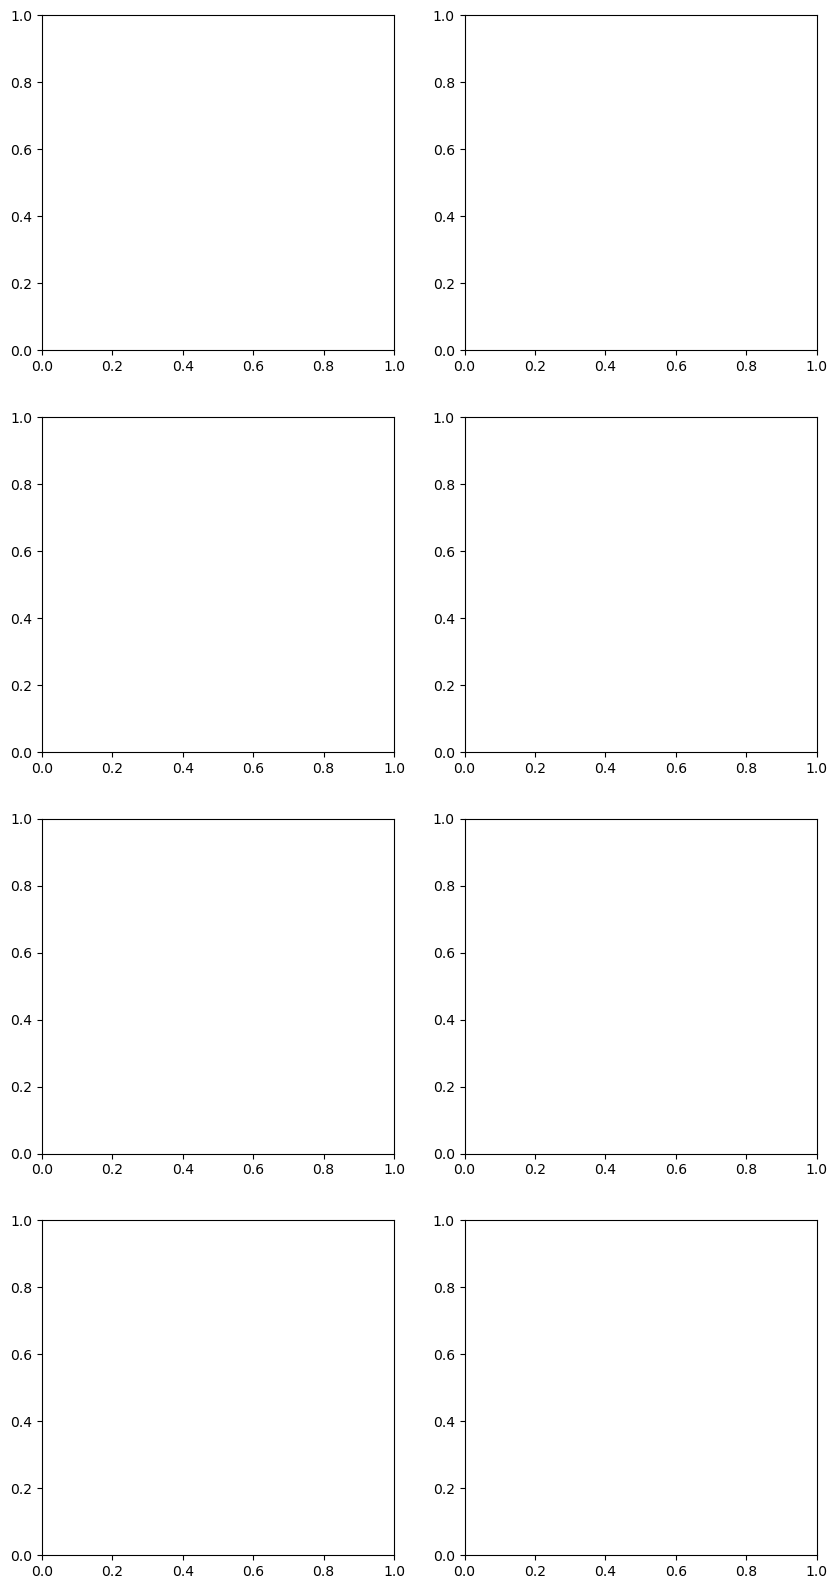

In [1484]:
lr_list = [0.1, 0.01, 0.001, 0.0001]
epochs = [20, 40, 60, 80, 100, 120]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

for i, lr in enumerate(lr_list):
     accuracies = []
     for epochsi in epochs:
          modelGD = LinearRegressionGradientDescent(learning_rate=lr, epochs=epochsi)
          modelGD.fit(X_train, y_train)
          y_pred = modelGD.predict(X_test)
          accuracy = 100 - modelGD.meanAbsolutePercentageError(y_pred, y_test)
          accuracies.append(accuracy) 
          # axes[i,1].text(epochsi, accuracy - 5, f'{accuracy:.2f}%', ha='center', fontsize=10)
          # for displaying the value of the dots of the accuracy plot
          # + 2.5 is for offset
          # epochsi is the x axis
          
     # loss curves
     axes[i, 0].plot(range(modelGD.epochs), modelGD.losses, marker='o')
     axes[i, 0].set_title(f'Learning rate: {lr}')
     axes[i, 0].set_xlabel('epochs')
     axes[i, 0].set_ylabel('losses')
     
     # accuracy plot
     if np.mean(accuracies) < 0:
          axes[i, 1].plot(epochs, accuracies, marker='o')
          axes[i, 1].set_title(f'Learning rate: {lr}')
          axes[i, 1].set_xlabel('Epochs')
          axes[i, 1].set_ylabel('Accuracy')
          axes[i, 1].set_xticks(epochs)
          axes[i, 1].set_yticks(accuracies)
     else:
          axes[i, 1].plot(epochs, accuracies, marker='o')
          axes[i, 1].set_title(f'Learning rate: {lr}')
          axes[i, 1].set_xlabel('Epochs')
          axes[i, 1].set_ylabel('Accuracy')
          axes[i, 1].set_xticks(epochs)
          axes[i, 1].set_yticks(range(0, 110, 10))
          

- Dataset: scaled and unscaled
- Algorithm: simple ols, simple gd, multiple ols
- Simple gd: learning rate, epochs
- Independent variables: variable1, variabel2, variable3, etc...
- Dependent Varibles: ?
- Plotting: Loss curve sama accuracy
- Input tetap unscaled, tapi ketika menggunakan setting scaled berarti di proses menjadi scaled data